# **Crop Yield Prediction - Supervised Regression - MAE/RMSE**

The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

All dataset(publicly available dataset) here(yield.csv,pesticides.csv,rainfall.csv,temp.csv) are taken form FAO (Food and Agriculture Organization) and World Data Bank.

http://www.fao.org/home/en/

https://data.worldbank.org/

**Data Collection**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataframe_yield=pd.read_csv('/content/drive/MyDrive/yield data complete/yield.csv')

In [ ]:
dataframe_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400

In [ ]:
dataframe_yield.tail()

Domain Code Domain  Area Code      Area  Element Code Element  \
56712          QC  Crops        181  Zimbabwe          5419   Yield   
56713          QC  Crops        181  Zimbabwe          5419   Yield   
56714          QC  Crops        181  Zimbabwe          5419   Yield   
56715          QC  Crops        181  Zimbabwe          5419   Yield   
56716          QC  Crops        181  Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
56712         15  Wheat       2012  2012  hg/ha  24420  
56713         15  Wheat       2013  2013  hg/ha  22888  
56714         15  Wheat       2014  2014  hg/ha  21357  
56715         15  Wheat       2015  2015  hg/ha  19826  
56716         15  Wheat       2016  2016  hg/ha  18294

In [ ]:
dataframe_yield.shape

(56717, 12)

In [ ]:
dataframe_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [ ]:
dataframe_yield.rename(columns={"Value":"hg/ha_yield"},inplace=True)

In [ ]:
dataframe_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  hg/ha_yield  
0  Maize       1961  1961  hg/ha        14000  
1  Maize       1962  1962  hg/ha        14000  
2  Maize       1963  1963  hg/ha        14260  
3  Maize       1964  1964  hg/ha        14257  
4  Maize       1965  1965  hg/ha        14400

dropping unwanted elements from yield dataframe

In [ ]:
dataframe_yield.drop(columns=["Element","Element Code","Domain Code","Domain","Unit","Area Code","Item Code","Year Code","Unit"],inplace=True)

In [ ]:
dataframe_yield.head()

Area   Item  Year  hg/ha_yield
0  Afghanistan  Maize  1961        14000
1  Afghanistan  Maize  1962        14000
2  Afghanistan  Maize  1963        14260
3  Afghanistan  Maize  1964        14257
4  Afghanistan  Maize  1965        14400

In [ ]:
dataframe_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
dataframe_yield.describe()

Year     hg/ha_yield
count  56717.000000    56717.000000
mean    1989.669570    62094.660084
std       16.133198    67835.932856
min     1961.000000        0.000000
25%     1976.000000    15680.000000
50%     1991.000000    36744.000000
75%     2004.000000    86213.000000
max     2016.000000  1000000.000000

In [ ]:
dataframe_rain=pd.read_csv("/content/drive/MyDrive/yield data complete/rainfall.csv")

In [ ]:
dataframe_rain.head()

Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327

In [ ]:
dataframe_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


There are null values in average_rain_fall_mm_per_year column. But to remove them we have to change it's datatype from object to float.

In [ ]:
dataframe_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(dataframe_rain['average_rain_fall_mm_per_year'], errors='coerce')

In [ ]:
dataframe_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [ ]:
dataframe_rain.shape

(6727, 3)

In [ ]:
dataframe_rain.head()

Area  Year  average_rain_fall_mm_per_year
0  Afghanistan  1985                          327.0
1  Afghanistan  1986                          327.0
2  Afghanistan  1987                          327.0
3  Afghanistan  1989                          327.0
4  Afghanistan  1990                          327.0

In [ ]:
dataframe_rain.tail()

Area  Year  average_rain_fall_mm_per_year
6722  Zimbabwe  2013                          657.0
6723  Zimbabwe  2014                          657.0
6724  Zimbabwe  2015                          657.0
6725  Zimbabwe  2016                          657.0
6726  Zimbabwe  2017                          657.0

Now, we remove null values from rain dataframe

In [ ]:
dataframe_rain =dataframe_rain.dropna()

In [ ]:
dataframe_rain.shape

(5947, 3)

In [ ]:
dataframe_rain.rename(columns={" Area":"Area"},inplace=True)

In [ ]:
dataframe_rain.head()

Area  Year  average_rain_fall_mm_per_year
0  Afghanistan  1985                          327.0
1  Afghanistan  1986                          327.0
2  Afghanistan  1987                          327.0
3  Afghanistan  1989                          327.0
4  Afghanistan  1990                          327.0

In [ ]:
dataframe_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


In [ ]:
dataframe_rain.describe()

Year  average_rain_fall_mm_per_year
count  5947.000000                    5947.000000
mean   2001.365899                    1124.743232
std       9.526335                     786.257365
min    1985.000000                      51.000000
25%    1993.000000                     534.000000
50%    2001.000000                    1010.000000
75%    2010.000000                    1651.000000
max    2017.000000                    3240.000000

In [ ]:
dataframe_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


merging dataframe_yield and dataframe_rain on Year and Area columns.

In [ ]:
dataframe_main=pd.merge(dataframe_yield,dataframe_rain,on=['Year','Area'],how='inner')

In [ ]:
dataframe_main.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year
count  25385.000000   25385.000000                   25385.000000
mean    2001.278787   68312.278353                    1254.849754
std        9.143915   75213.292733                     804.449430
min     1985.000000      50.000000                      51.000000
25%     1994.000000   17432.000000                     630.000000
50%     2001.000000   38750.000000                    1150.000000
75%     2009.000000   94286.000000                    1761.000000
max     2016.000000  554855.000000                    3240.000000

In [ ]:
dataframe_pesticide=pd.read_csv("/content/drive/MyDrive/yield data complete/pesticides.csv")

In [ ]:
dataframe_pesticide.head()

Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  
2  tonnes of active ingredients  121.0  
3  tonnes of active ingredients  121.0  
4  tonnes of active ingredients  201.0

renaming Value column as pesticide_tons

In [ ]:
dataframe_pesticide.rename(columns={"Value":"pesticide_tons"},inplace=True)

In [ ]:
dataframe_pesticide.head()

Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  pesticide_tons  
0  tonnes of active ingredients           121.0  
1  tonnes of active ingredients           121.0  
2  tonnes of active ingredients           121.0  
3  tonnes of active ingredients           121.0  
4  tonnes of active ingredients           201.0

In [ ]:
dataframe_pesticide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Domain          4349 non-null   object 
 1   Area            4349 non-null   object 
 2   Element         4349 non-null   object 
 3   Item            4349 non-null   object 
 4   Year            4349 non-null   int64  
 5   Unit            4349 non-null   object 
 6   pesticide_tons  4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


dropping unwanted columns from pesticide dataframe

In [ ]:
dataframe_pesticide.drop(columns=["Domain",'Element','Item',"Unit"],inplace=True)

In [ ]:
dataframe_pesticide.head()

Area  Year  pesticide_tons
0  Albania  1990           121.0
1  Albania  1991           121.0
2  Albania  1992           121.0
3  Albania  1993           121.0
4  Albania  1994           201.0

In [ ]:
dataframe_pesticide.describe()

Year  pesticide_tons
count  4349.000000    4.349000e+03
mean   2003.138883    2.030334e+04
std       7.728044    1.177362e+05
min    1990.000000    0.000000e+00
25%    1996.000000    9.300000e+01
50%    2003.000000    1.137560e+03
75%    2010.000000    7.869000e+03
max    2016.000000    1.807000e+06

In [ ]:
dataframe_pesticide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            4349 non-null   object 
 1   Year            4349 non-null   int64  
 2   pesticide_tons  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.1+ KB


merging dataframe_pesticide with the earlier created merged dataframe 'dataframe_main'.

In [ ]:
dataframe_main=pd.merge(dataframe_main,dataframe_pesticide,on=['Year','Area'],how='inner')

In [ ]:
dataframe_main.shape

(18949, 6)

In [ ]:
dataframe_main.head()

Area   Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania  Maize  1990        36613                         1485.0   
1  Albania  Maize  1991        29068                         1485.0   
2  Albania  Maize  1992        24876                         1485.0   
3  Albania  Maize  1993        24185                         1485.0   
4  Albania  Maize  1994        25848                         1485.0   

   pesticide_tons  
0           121.0  
1           121.0  
2           121.0  
3           121.0  
4           201.0

In [ ]:
dataframe_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18949 entries, 0 to 18948
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           18949 non-null  object 
 1   Item                           18949 non-null  object 
 2   Year                           18949 non-null  int64  
 3   hg/ha_yield                    18949 non-null  int64  
 4   average_rain_fall_mm_per_year  18949 non-null  float64
 5   pesticide_tons                 18949 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 888.4+ KB


In [ ]:
dataframe_main.shape

(18949, 6)

In [ ]:
dataframe_temp=pd.read_csv('/content/drive/MyDrive/yield data complete/temp.csv')

In [ ]:
dataframe_temp.shape

(71311, 3)

In [ ]:
dataframe_temp.head()

year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [ ]:
dataframe_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


Note that there are some null values in avg_temp column. We will sort that out later.

renaming year column to Year and country column to Area to make it easier to merge with dataframe_main

In [ ]:
dataframe_temp.rename(columns={'year':'Year','country':'Area'},inplace=True)

In [ ]:
dataframe_temp.head()

Year           Area  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [ ]:
dataframe_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
dataframe_temp.describe()

Year      avg_temp
count  71311.000000  68764.000000
mean    1905.799007     16.183876
std       67.102099      7.592960
min     1743.000000    -14.350000
25%     1858.000000      9.750000
50%     1910.000000     16.140000
75%     1962.000000     23.762500
max     2013.000000     30.730000

dropping null values from temp dataset

In [ ]:
dataframe_temp=dataframe_temp.dropna()

In [ ]:
dataframe_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68764 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      68764 non-null  int64  
 1   Area      68764 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


merging dataframe temp with dataframe_main on year and area columns

In [ ]:
dataframe_main=pd.merge(dataframe_main,dataframe_temp,on=['Area','Year'])

In [ ]:
dataframe_main.head()

Area   Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania  Maize  1990        36613                         1485.0   
1  Albania  Maize  1991        29068                         1485.0   
2  Albania  Maize  1992        24876                         1485.0   
3  Albania  Maize  1993        24185                         1485.0   
4  Albania  Maize  1994        25848                         1485.0   

   pesticide_tons  avg_temp  
0           121.0     16.37  
1           121.0     15.36  
2           121.0     16.06  
3           121.0     16.05  
4           201.0     16.96

In [ ]:
dataframe_main.shape

(28242, 7)

In [ ]:
dataframe_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticide_tons                 28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


**DATA PRE-PROCESSING**

In [ ]:
dataframe_main.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticide_tons                   0
avg_temp                         0
dtype: int64

clearly, there are no null values in the dataframe_main dataset.

**Encoding Categorical Variables using One Hot Encoding**

The dataframe has two category columns, which are variables that have label values rather than numeric values. The range of available values is frequently constrained to a predetermined set, like in this example, the values for the items and nations.

Several machine learning algorithms are unable to act directly on label data. They demand that all input and output variables be numbers.

Thus, categorical data must be transformed into numerical data. One hot encoding method involves transforming categorical information into a format that may be given to ML algorithms to help them perform better at prediction. These two columns will be converted to a one-hot numeric array for that purpose using the One-Hot Encoding method.

The Numerical Value of the element in the dataset is represented by the category value. For each category, a binary column will be created using this encoding, and the results are returned as a matrix.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
dataframe_main_onehot = pd.get_dummies(dataframe_main, columns=
['Area',"Item"], prefix = ['Country',"Item"])
features=dataframe_main_onehot.loc[:, dataframe_main_onehot.columns !='hg/ha_yield']
label=dataframe_main['hg/ha_yield']
features.head()

Year  average_rain_fall_mm_per_year  pesticide_tons  avg_temp  \
0  1990                         1485.0           121.0     16.37   
1  1991                         1485.0           121.0     15.36   
2  1992                         1485.0           121.0     16.06   
3  1993                         1485.0           121.0     16.05   
4  1994                         1485.0           201.0     16.96   

   Country_Albania  Country_Algeria  Country_Angola  Country_Argentina  \
0             True            False           False              False   
1             True            False           False              False   
2             True            False           False              False   
3             True            False           False              False   
4             True            False           False              False   

   Country_Armenia  Country_Australia  ...  Item_Cassava  Item_Maize  \
0            False              False  ...         False        True   
1            False              False  ...         False        True   
2            False              False  ...         False        True   
3            False              False  ...         False        True   
4            False              False  ...         False        True   

   Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  Item_Sorghum  \
0                      False          False             False         False   
1                      False          False             False         False   
2                      False          False             False         False   
3                      False          False             False         False   
4                      False          False             False         False   

   Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
0          False                False       False      False  
1          False                False       False      False  
2          False                False       False      False  
3          False                False       False      False  
4          False                False       False      False  

[5 rows x 115 columns]

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 115 entries, Year to Item_Yams
dtypes: bool(111), float64(3), int64(1)
memory usage: 3.9 MB


**Exploratory Data Analysis (EDA) - Uncover Insights, Ignite Understanding**

In [ ]:
dataframe_main.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  28242.000000   28242.000000                    28242.00000   
mean    2001.544296   77053.332094                     1149.05598   
std        7.051905   84956.612897                      709.81215   
min     1990.000000      50.000000                       51.00000   
25%     1995.000000   19919.250000                      593.00000   
50%     2001.000000   38295.000000                     1083.00000   
75%     2008.000000  104676.750000                     1668.00000   
max     2013.000000  501412.000000                     3240.00000   

       pesticide_tons      avg_temp  
count    28242.000000  28242.000000  
mean     37076.909344     20.542627  
std      59958.784665      6.312051  
min          0.040000      1.300000  
25%       1702.000000     16.702500  
50%      17529.440000     21.510000  
75%      48687.880000     26.000000  
max     367778.000000     30.650000

**average_rain_fall_mm_per_year**: The average rainfall per year is approximately 1149, with the least rainfall being 51 and the most 3240.

**pesticides_tonnes**: The mean pesticides used in tonnes is a whopping 37077 tonnes, with minimum as little as 0.04 and maximum as huge as 367778 tonnes.

**hg/ha_yield**: The average crop production yield is 77053.3. Ranging from 50 all the way to 501412 hectograms per hectare.

In [ ]:
dataframe_main.describe(include='object')

Area      Item
count   28242     28242
unique    101        10
top     India  Potatoes
freq     4048      4276

**Area**: There are 101 unique countries/areas, with India being the most frequent category, occurring 4048 times out of 28242 entries.

**Item**: 10 unique types of crops are present. The most common type is "Potatoes", occurring 4276 times

In [ ]:
dataframe_main.groupby('Item').count()

Area  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
Item                                                                           
Cassava               2045  2045         2045                           2045   
Maize                 4121  4121         4121                           4121   
Plantains and others   556   556          556                            556   
Potatoes              4276  4276         4276                           4276   
Rice, paddy           3388  3388         3388                           3388   
Sorghum               3039  3039         3039                           3039   
Soybeans              3223  3223         3223                           3223   
Sweet potatoes        2890  2890         2890                           2890   
Wheat                 3857  3857         3857                           3857   
Yams                   847   847          847                            847   

                      pesticide_tons  avg_temp  
Item                                            
Cassava                         2045      2045  
Maize                           4121      4121  
Plantains and others             556       556  
Potatoes                        4276      4276  
Rice, paddy                     3388      3388  
Sorghum                         3039      3039  
Soybeans                        3223      3223  
Sweet potatoes                  2890      2890  
Wheat                           3857      3857  
Yams                             847       847

<ipython-input-64-a6fa2edbb161>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item', data=dataframe_main, palette='viridis')  # Use 'viridis' for a colorful palette


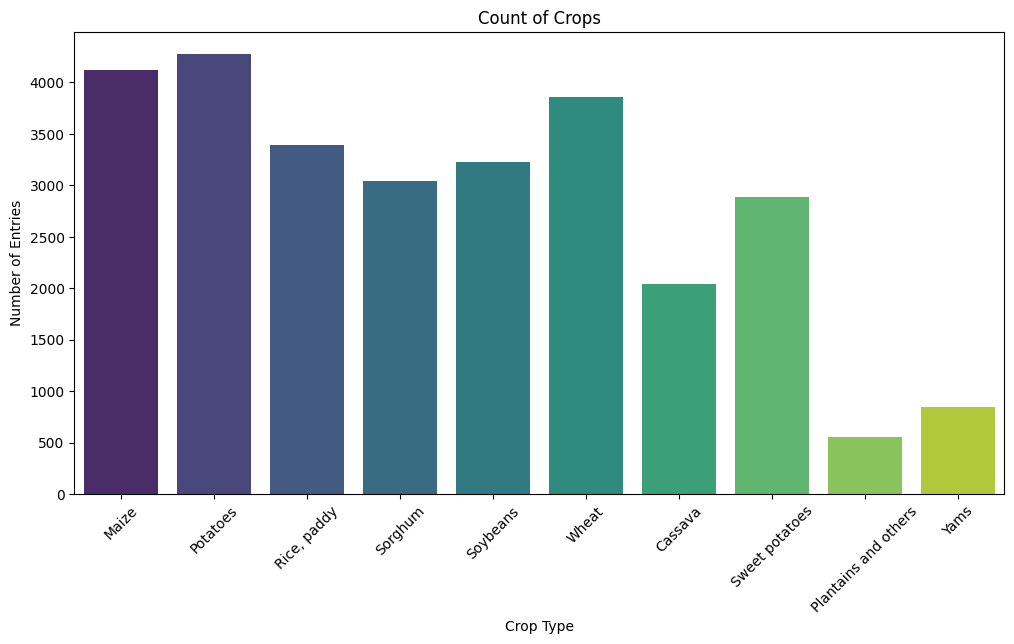

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for 'Item'
plt.figure(figsize=(12, 6))
sns.countplot(x='Item', data=dataframe_main, palette='viridis')  # Use 'viridis' for a colorful palette
plt.title('Count of Crops')
plt.xlabel('Crop Type')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
dataframe_main['Area'].nunique()

101

There are 101 nations in the dataset.

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Get unique countries from the 'Area' column
countries = dataframe_main['Area'].unique()

# Create a world map using plotly.express
fig = px.choropleth(
    locations=countries,  # Use the list of unique countries as locations
    locationmode='country names',  # Specify that the locations are country names
    color=countries,  # Color the map based on the countries
    title='Map of Countries in the Dataset',
)

fig.show()

In [ ]:
dataframe_main.groupby(['Area'],sort='True')['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

In [ ]:
grouped = dataframe_main.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

Item       Area  hg/ha_yield
0               Cassava      India       385818
1                 Maize      Qatar       207556
2  Plantains and others  Guatemala       418505
3              Potatoes    Belgium       501412
4           Rice, paddy  Australia       103895
5               Sorghum    Algeria       206000
6              Soybeans     Turkey        41609
7        Sweet potatoes    Senegal       400000
8                 Wheat     Zambia        99387
9                  Yams       Mali       250000

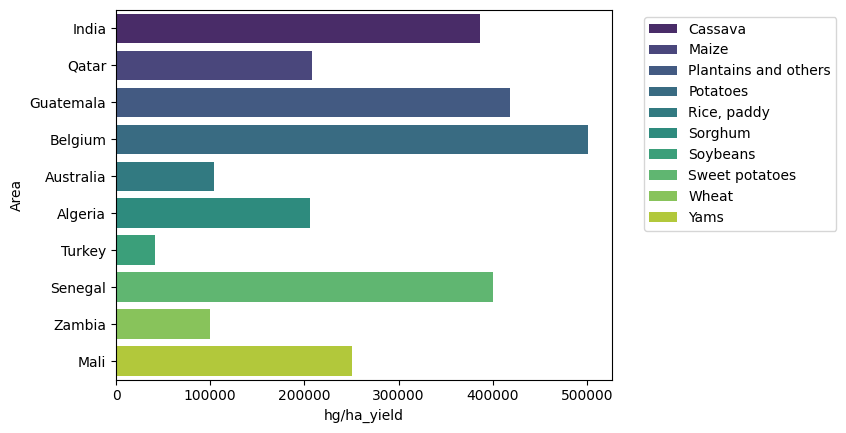

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=best_areas_df, x='hg/ha_yield', y='Area', hue='Item', palette='viridis')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Cassava**: India is the top at producing Cassava

**Maize**: Tajikistan excels at growing Maize

**Plantains and others:**: Guatemala is the best source of PLantains and others

**Potatoes**: France is the top at producing potatoes

**Rice, paddy**: Australia is the leading country in producing rice, paddy

**Sorghum**: Algeria excels at producing sorghum

**Soybeans**: Turkey is unrivalled in producing soybeans

**Sweet potatoes**: Senegal is the best at producing sweet potatoes

**Wheat**: Zambia surpasses every country at producing wheat

**Yams**: Mali outshines all countries in growing yams

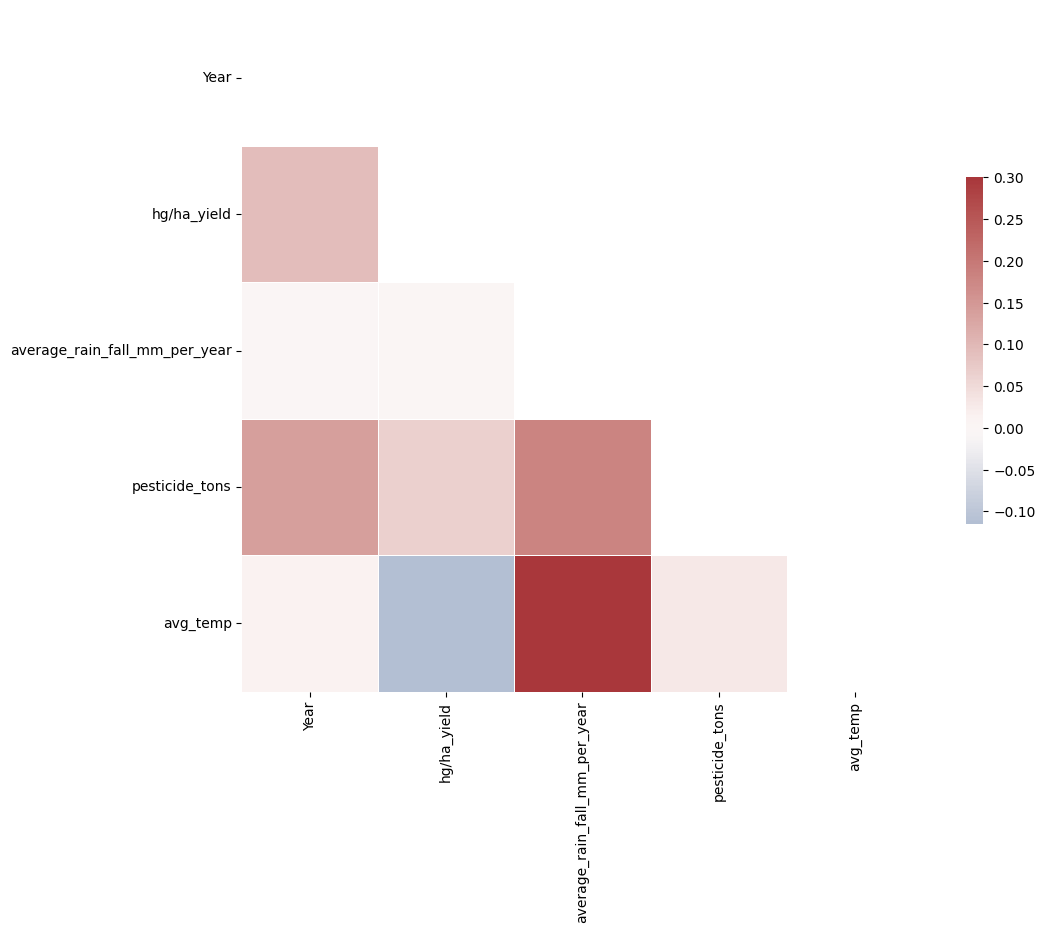

In [ ]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
correlation_data=dataframe_main.select_dtypes(include=[np.number]).corr()
mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# Make a unique diverging colour map.
cmap = sns.palette="vlag"
# Create the heatmap with the appropriate aspect ratio and a mask.
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5});

The above correlation map shows that there is no association between any of the data frame's columns.

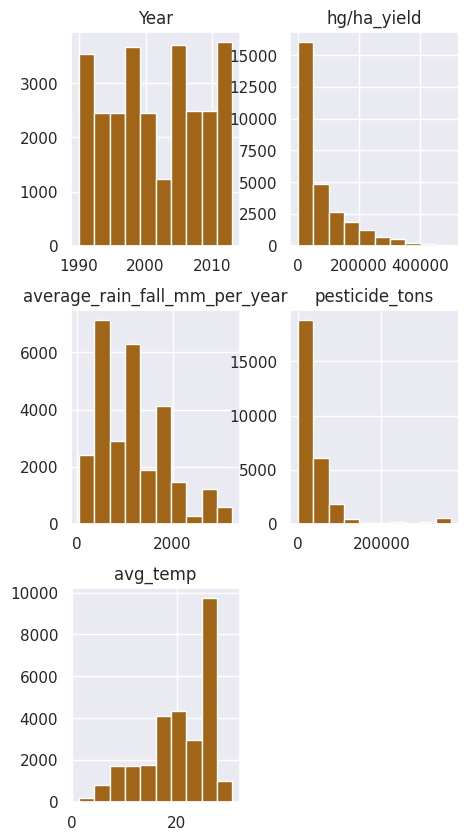

In [ ]:
sns.set(palette='BrBG')
dataframe_main.hist(figsize=(5,10));

**rainfall**: Most rainfall is between 0-1000 and very few is around 3000.

**pesticides_tonnes**: The majority of used pesticides is little to zero.

**avg_temp**: Most average temperatures is around 25.

**hg/ha yield**: There is a vast majority of yield production around 0.

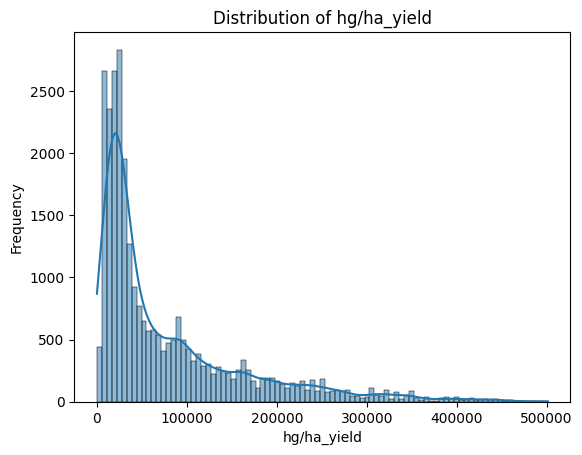

In [ ]:
sns.histplot(dataframe_main['hg/ha_yield'], kde=True)
plt.title('Distribution of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()

most of the yield of the crops are less than 100000 hg/ha.

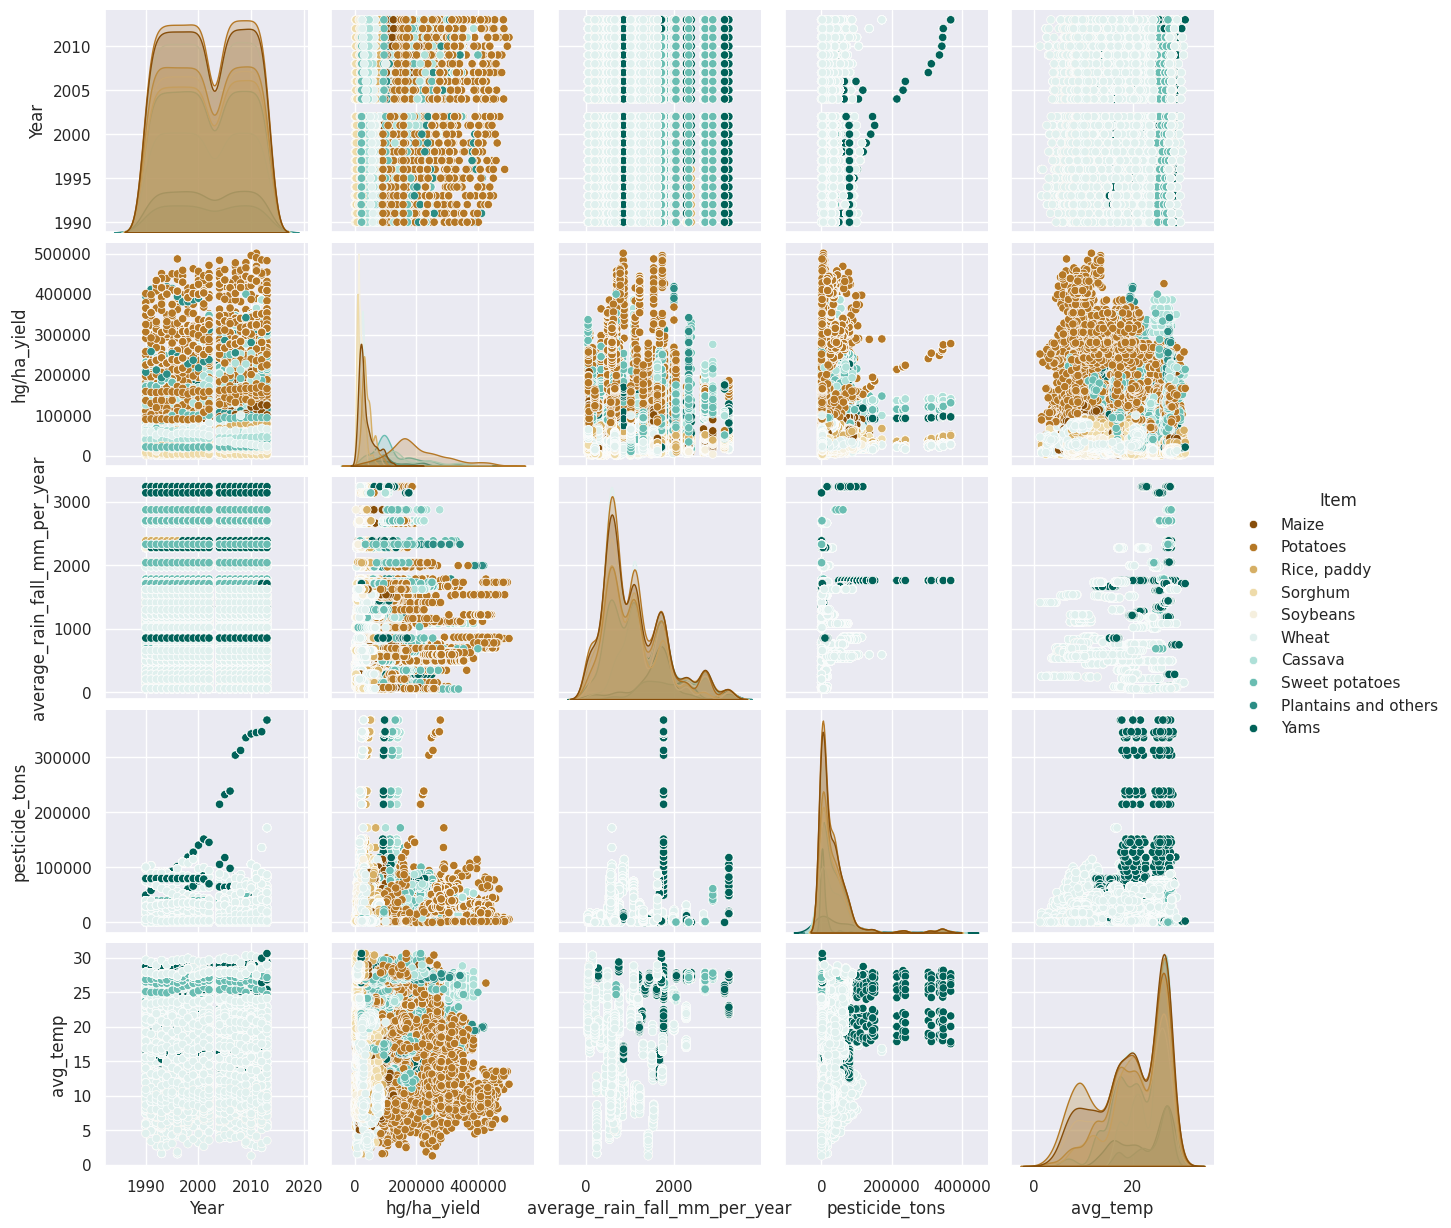

In [ ]:
sns.pairplot(data=dataframe_main,hue='Item',kind='scatter',palette='BrBG')

Inferences from the above pairplot:

--**Items**:

 *yams*: It appears that yams uses a lot of pesticides, grow on all rainfall ranges.

   *wheat*: Wheat thrives on all average temperature ranges and grows on average to no rainfall.

--**hg/ha_yield**:

  *Sorghum and Soybeans* are lowest in yield production while *potatoes* are most popular.

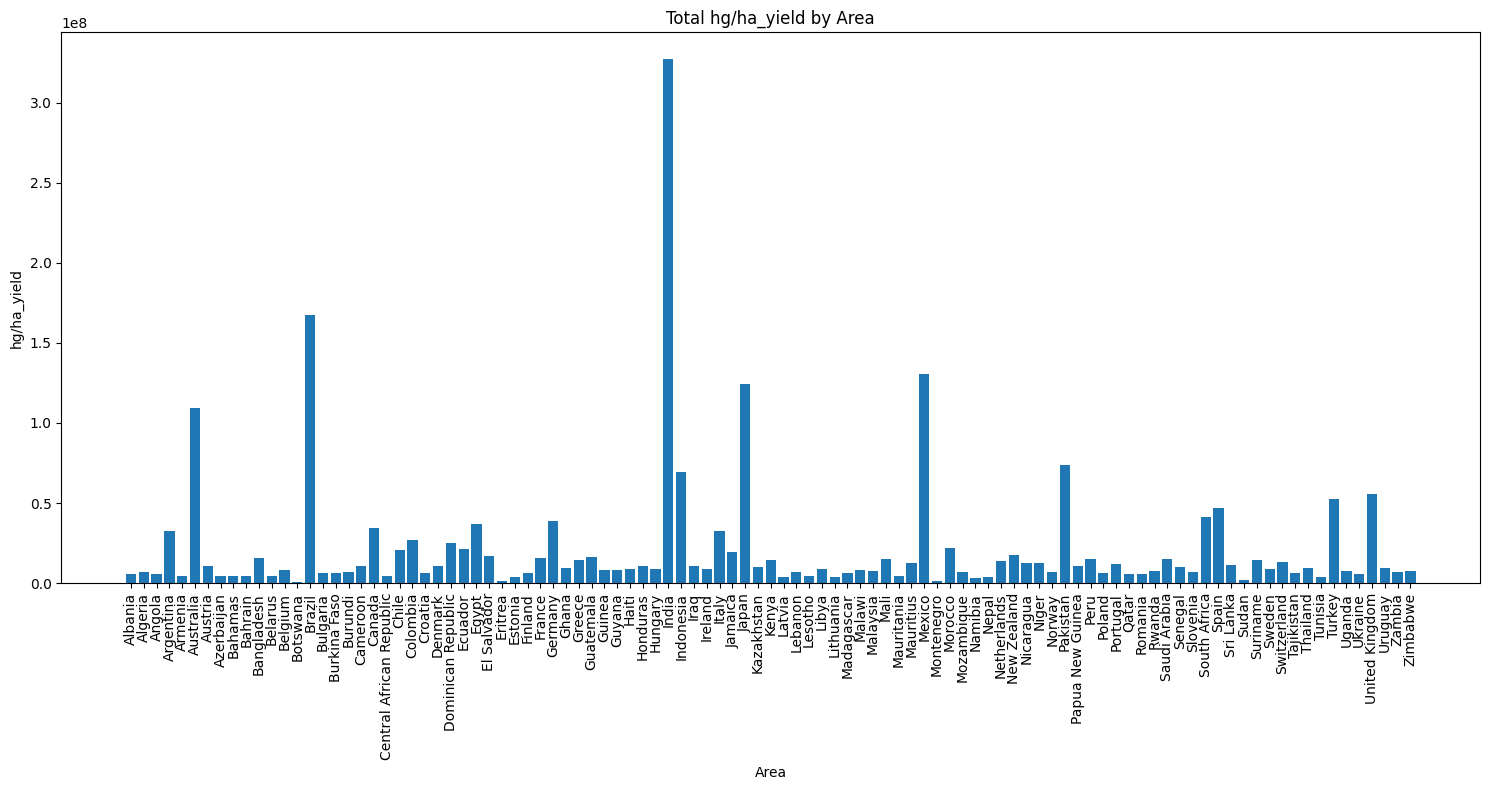

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Area' and calculate the sum of 'hg/ha_yield' for each area
area_yield = dataframe_main.groupby('Area')['hg/ha_yield'].sum()

# Create a bar plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
plt.bar(area_yield.index, area_yield.values)
plt.xlabel('Area')
plt.ylabel('hg/ha_yield')
plt.title('Total hg/ha_yield by Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

India, Brazil, and Mexico top in hg/ha yield, for all crops combined.

In [ ]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(dataframe_main, left_on='NAME', right_on='Area', how='left')

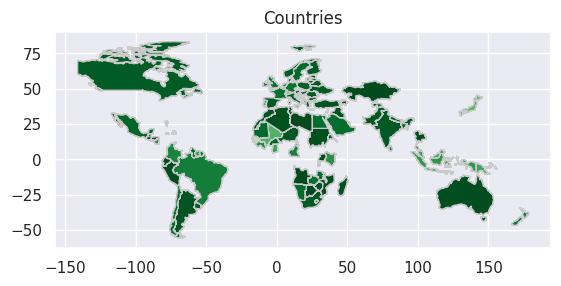

In [ ]:
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
plt.title("Countries")
plt.show()

the darker the shade, the higher is the hg/ha yield for that country.

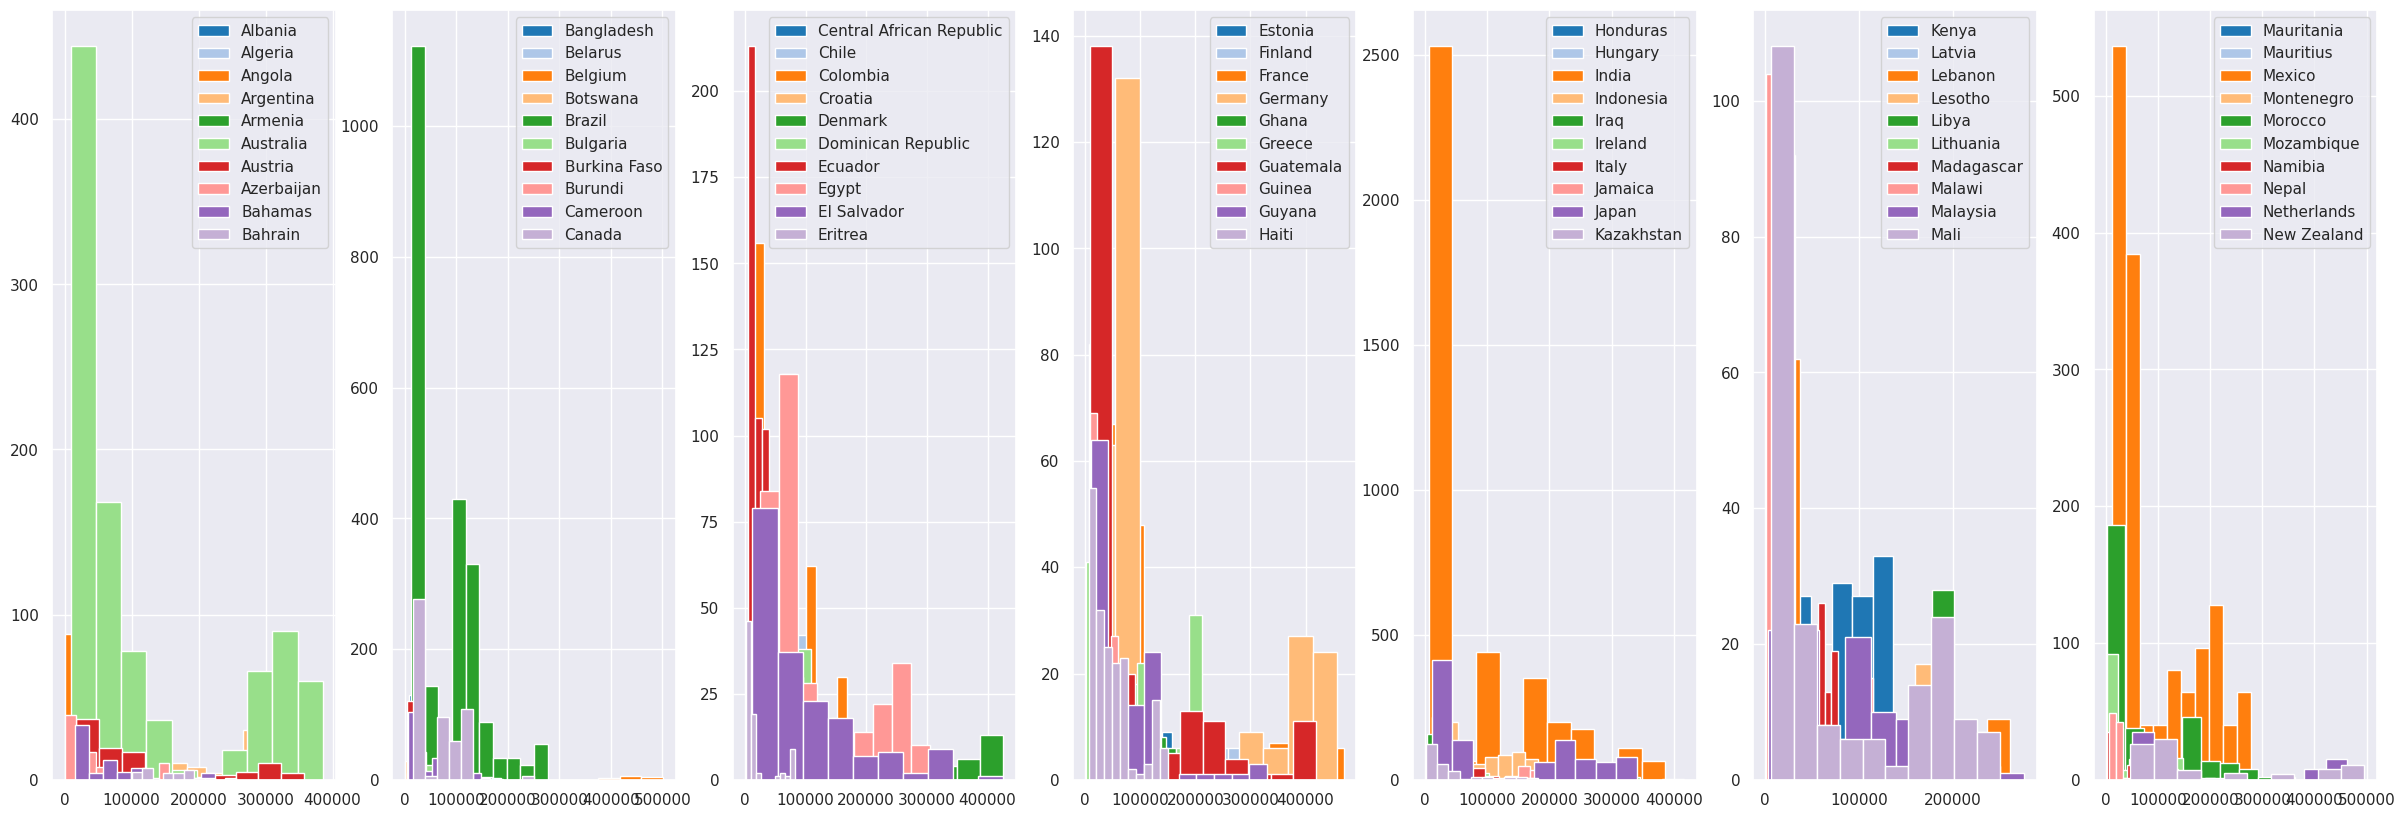

In [ ]:
palette = sns.color_palette('tab20', 21,as_cmap=True)
num_plots = 7
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(dataframe_main['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
j=0
for i, ax in enumerate(axs):

    plot_df = dataframe_main[dataframe_main['Area'].isin(area_chunks[i])]
    for i, area in enumerate(plot_df['Area'].unique()):
       data = plot_df[plot_df['Area'] == area]
       ax.hist(data['hg/ha_yield'], facecolor=palette(i), label=area)

    ax.legend()
    j+=1

plt.show()


In [ ]:
for i in range(0,7):
    plot_df = dataframe_main[dataframe_main['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())

hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area     Item                 
Botswana Maize     2350.130435
         Sorghum   5175.869565
Cameroon Soybeans  7566.782609
Burundi  Wheat     7641.913043
         Soybeans  8140.043478

hg/ha_yield
Area                     Item                
Eritrea                  Sorghum  4609.000000
                         Maize    6138.600000
Ecuador                  Wheat    7111.956522
Eritrea                  Wheat    7722.900000
Central African Republic Sorghum  9353.913043

hg/ha_yield
Area   Item                 
Haiti  Maize     7905.565217
       Sorghum   8157.913043
Ghana  Sorghum  10291.347826
Guinea Sorghum  11584.608696
       Maize    13434.652174

hg/ha_yield
Area       Item                  
Honduras   Wheat      5574.130435
India      Sorghum    8452.434783
Kazakhstan Wheat      9873.952381
India      Soybeans  10354.913043
Iraq       Sorghum   10695.565217

hg/ha_yield
Area       Item                 
Malaysia   Soybeans  3333.000000
Madagascar Soybeans  6267.173913
Malawi     Sorghum   6403.086957
Madagascar Sorghum   6452.304348
Lesotho    Sorghum   6872.913043

hg/ha_yield
Area       Item                
Namibia    Sorghum  2684.347826
Mauritania Sorghum  4673.869565
Mozambique Sorghum  4830.304348
Morocco    Sorghum  6594.739130
           Maize    6925.173913

In [ ]:
for i in range(0,7):
    plot_df = dataframe_main[dataframe_main['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

hg/ha_yield
Area      Item                         
Australia Potatoes        330944.826087
Austria   Potatoes        291058.043478
Argentina Potatoes        262059.173913
Australia Sweet potatoes  257610.826087
Algeria   Potatoes        182413.956522

hg/ha_yield
Area       Item                   
Belgium    Potatoes  448891.538462
Brazil     Potatoes  196056.000000
Belarus    Potatoes  161430.761905
Bangladesh Potatoes  134269.130435
Brazil     Cassava   133087.869565

hg/ha_yield
Area        Item                               
Denmark     Potatoes              384700.043478
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Finland   Potatoes              234699.956522

hg/ha_yield
Area    Item                         
Japan   Potatoes        311005.260870
Ireland Potatoes        310907.652174
India   Cassava         282234.434783
Italy   Potatoes        237861.347826
Japan   Sweet potatoes  237639.391304

hg/ha_yield
Area     Item                   
Lebanon  Potatoes  226491.565217
Mali     Potatoes  195653.869565
Libya    Potatoes  169057.608696
Lesotho  Potatoes  161995.695652
Malaysia Cassava   153481.521739

hg/ha_yield
Area        Item                   
New Zealand Potatoes  436177.826087
Netherlands Potatoes  433548.913043
Mexico      Potatoes  228553.695652
Morocco     Potatoes  217065.695652
Mauritius   Potatoes  211356.869565

In [ ]:
dk=dataframe_main.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

hg/ha_yield
Area           Item                   
Belgium        Potatoes  448891.538462
New Zealand    Potatoes  436177.826087
Netherlands    Potatoes  433548.913043
United Kingdom Potatoes  406131.695652
Switzerland    Potatoes  400808.913043
...                                ...
Angola         Sorghum     2926.769231
Namibia        Sorghum     2684.347826
Niger          Sorghum     2592.913043
Botswana       Maize       2350.130435
Tajikistan     Soybeans     941.750000

[598 rows x 1 columns]

**Inferences:**

Group 0: Australia produced the largest amount of yield harvesting potatoes while Angola has the least yield harvesting sorghum,soybeans and maize.

Group 1: Egypt was producing most yield in this group growing sweet potatoes and potatoes while Ecuador was struggling in harvesting wheat.

Group 2: France and Germany are at the top of yield production both harvesting potatoes while Honduras wasn't in luck harvesting wheat.

Group 3: India soared in growing Cassava and Japan was at the top growing potatoes while Madagascar struggled to grow soybeans and sorghum.

Group 4: Morocco and Mexico shined in yield production of potatoes while Niger failed to have high productions of wheat.

Group 5: Pakistan was struggling in growing sorghum while South Africa Spain, and Saudi Arabia shined in growing Potatoes.

Group 6: Tajikistan failed to harvest large amounts of soybeans while United Kingdom and Turkey produced a myriad of potatoes.

 **Collectively:**

Top producing countries: United Kingdom, France, Germany, Australia, and Japan.

Top produced Item: potatoes.

Least producing countries: Zimbabwe, Azerbaijan, Angola, Niger, Tajikistan.

Least produced item: sorghum and soybeans.

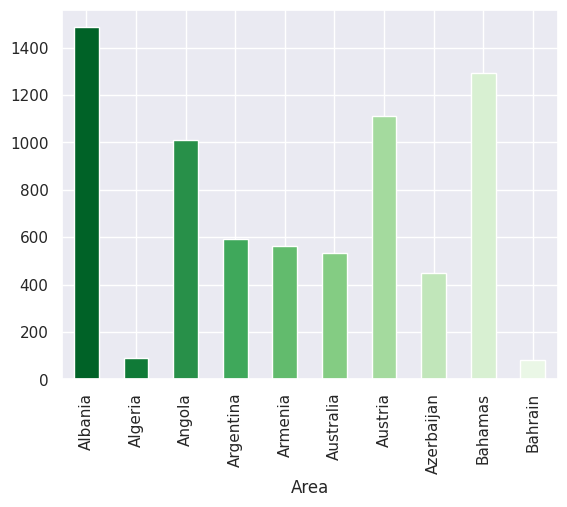

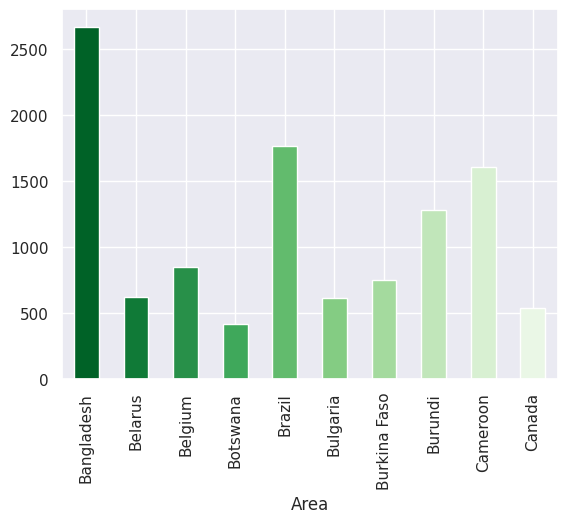

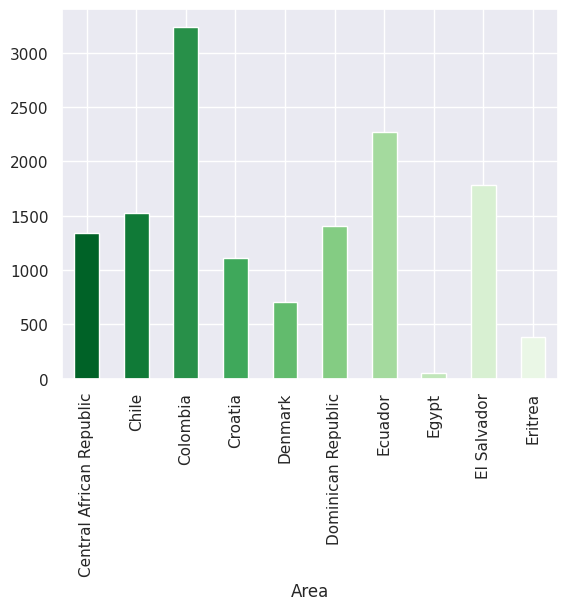

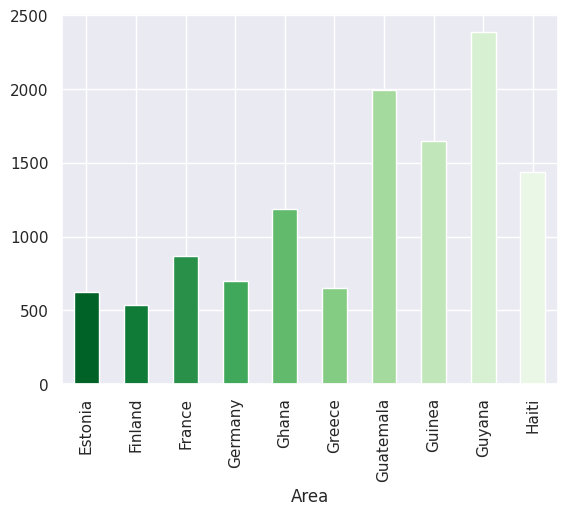

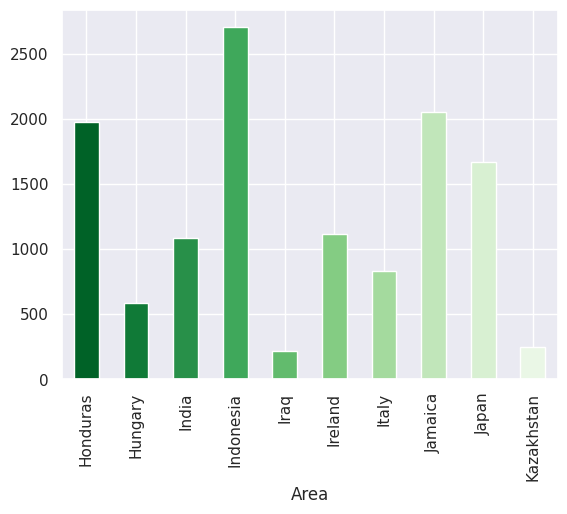

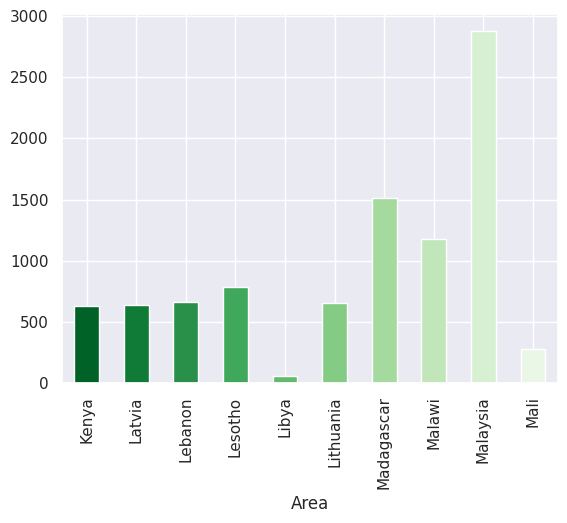

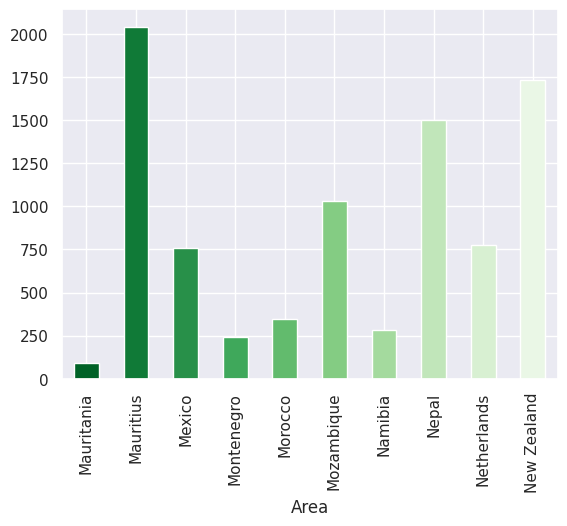

In [ ]:
import seaborn as sns
colorss = sns.color_palette("Greens_r", n_colors=len(plot_df['Area'].unique()))
for i in range(0,7):
    plot_df = dataframe_main[dataframe_main['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color=colorss)
    plt.xticks(rotation=90)
    plt.show()

**Inferences**:

Top rainfall countries: Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, and Suriname have rainfall with over 2000 mm.

Least rainfall countries: Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan,and Algeria have rainfall with less than 500 mm.

<ipython-input-95-32c646beeb82>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




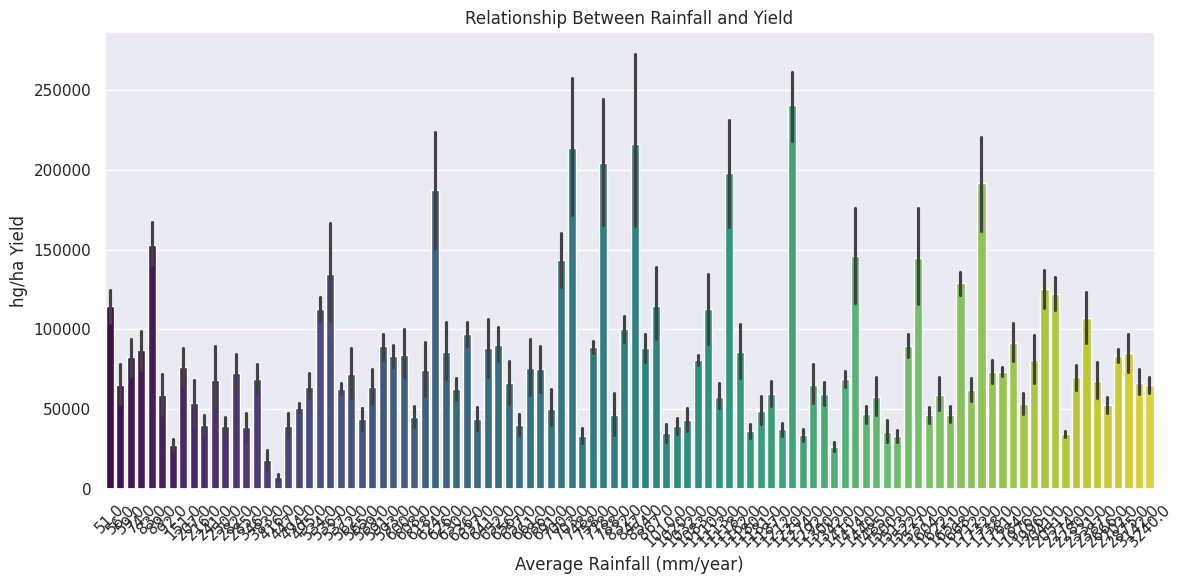

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=dataframe_main, palette='viridis')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('hg/ha Yield')
plt.title('Relationship Between Rainfall and Yield')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rainfall well below the average mm/year value and well above the average mm/year value results in reduced hg/ha yield for the crop.

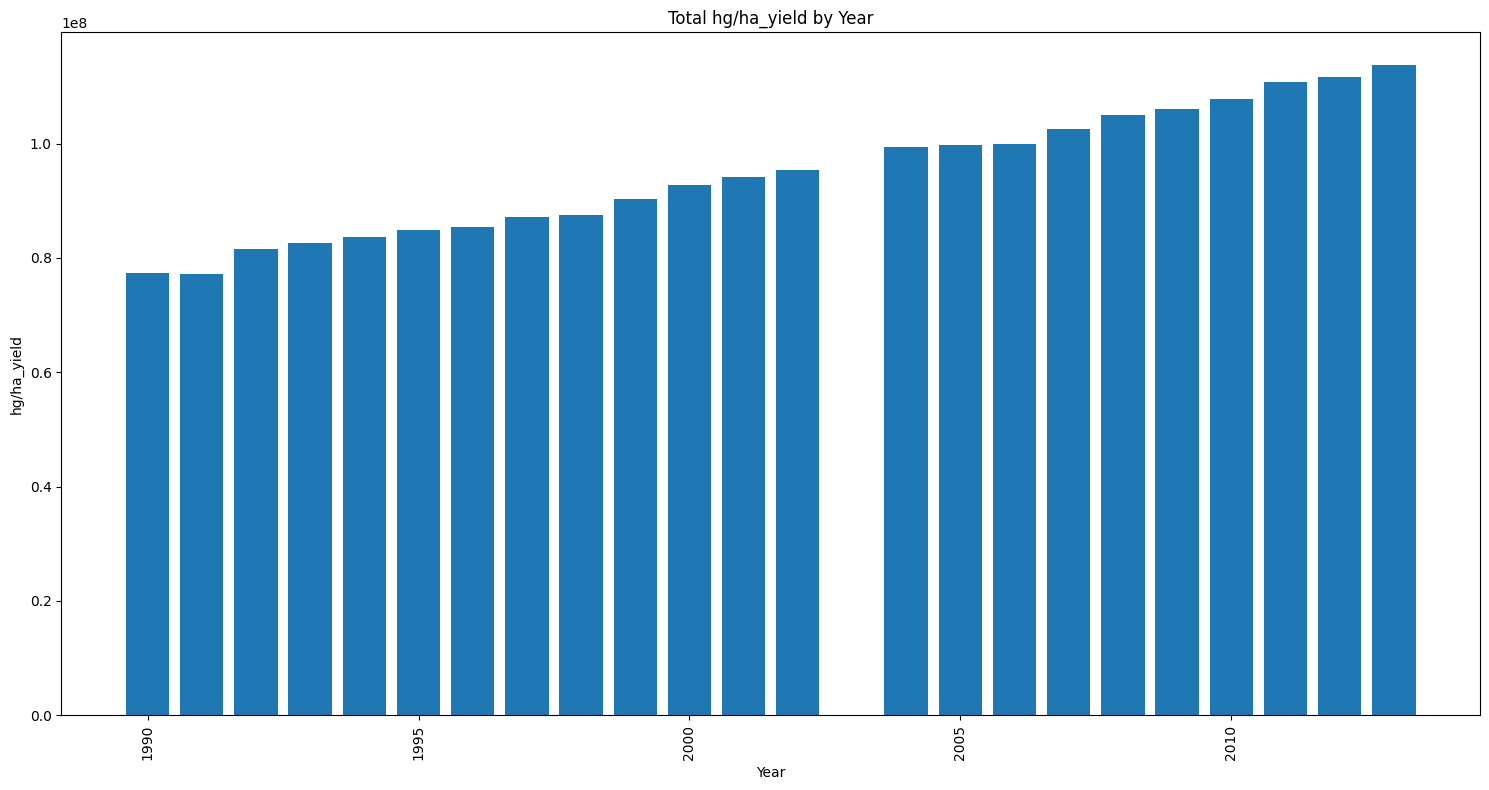

In [ ]:
# Create a bar plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
plt.bar(year_yield.index, year_yield.values)
plt.xlabel('Year')
plt.ylabel('hg/ha_yield')
plt.title('Total hg/ha_yield by Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()





clearly, the hg/ha yield has been steadily increasing with increase in year.

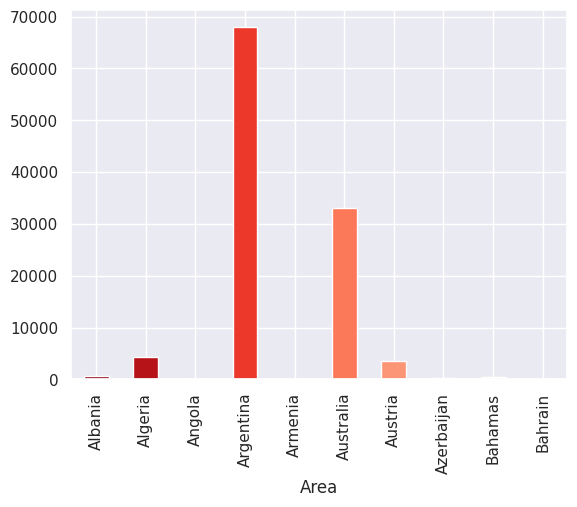

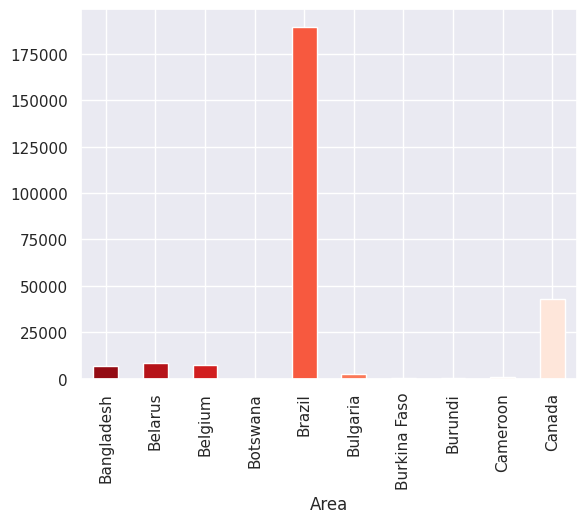

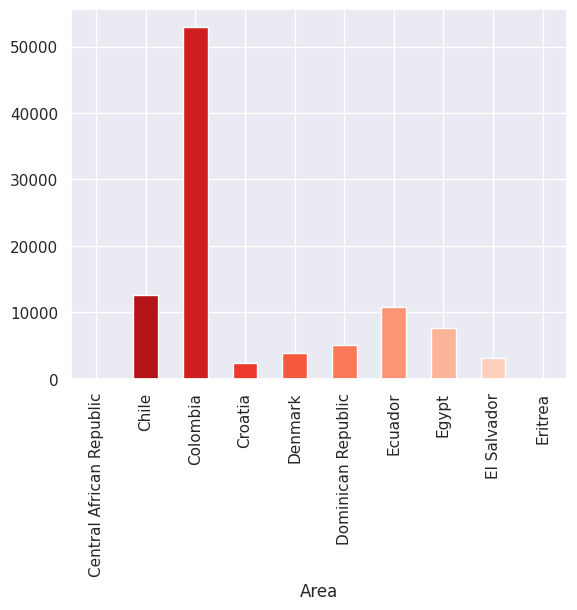

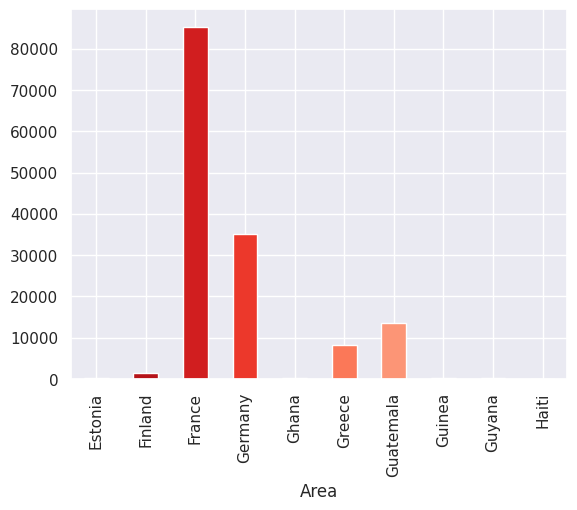

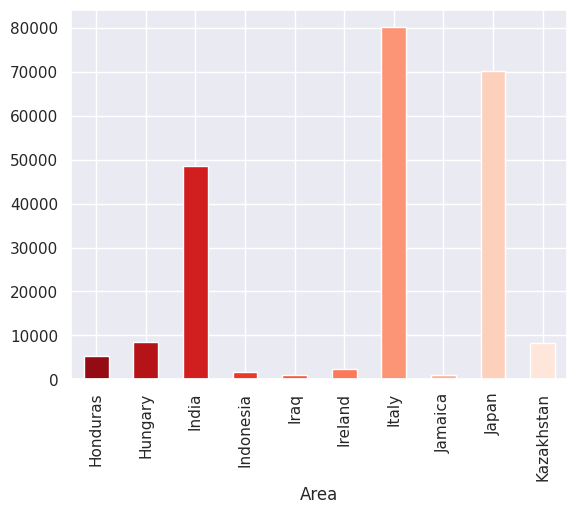

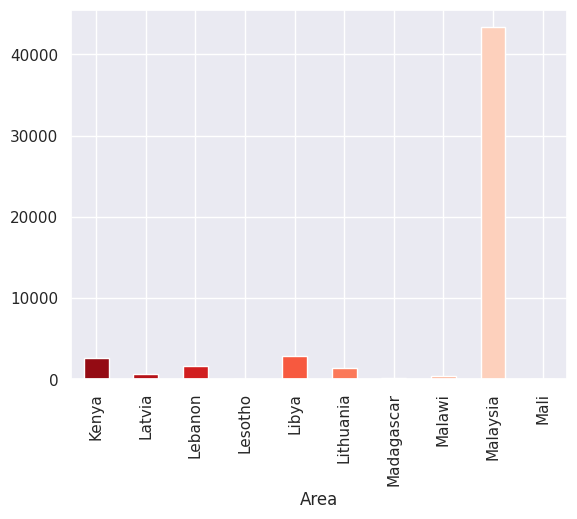

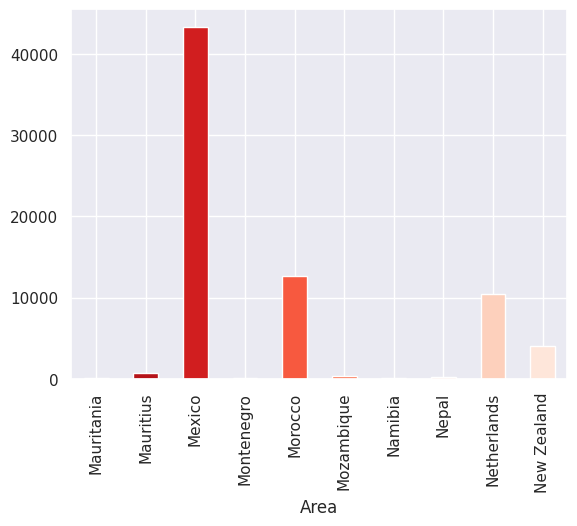

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
colorss = sns.color_palette("Reds_r", n_colors=len(plot_df['Area'].unique()))
for i in range(0,7):
    plot_df = dataframe_main[dataframe_main['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticide_tons'].mean().plot(kind='bar',rot=0,color=colorss)
    plt.xticks(rotation=90)
    plt.show()

**Inferences**:

Top pesticides using countries: Brazil, Italy, Argentina.


France: For a high yield producing country, using over 80000 tonnes of pesticides could be harmful.


Japan: Another high producing country using over 60000 tonnes of pesticides.

Least pesticides using countries: Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Cenrral African Republic, Croatia, Egypt, El Salvador,Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritana, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay **have been using pesticides with less than 10000 tonnes**.

All poorly producing yield countries are included in least pesticides usage countries.

Germany, Australia, and United Kingdom are top producing countries and they use an average amount of pesticides around 30000 tonnes.

**Now this begs the question; do pesticides affect yield production?**

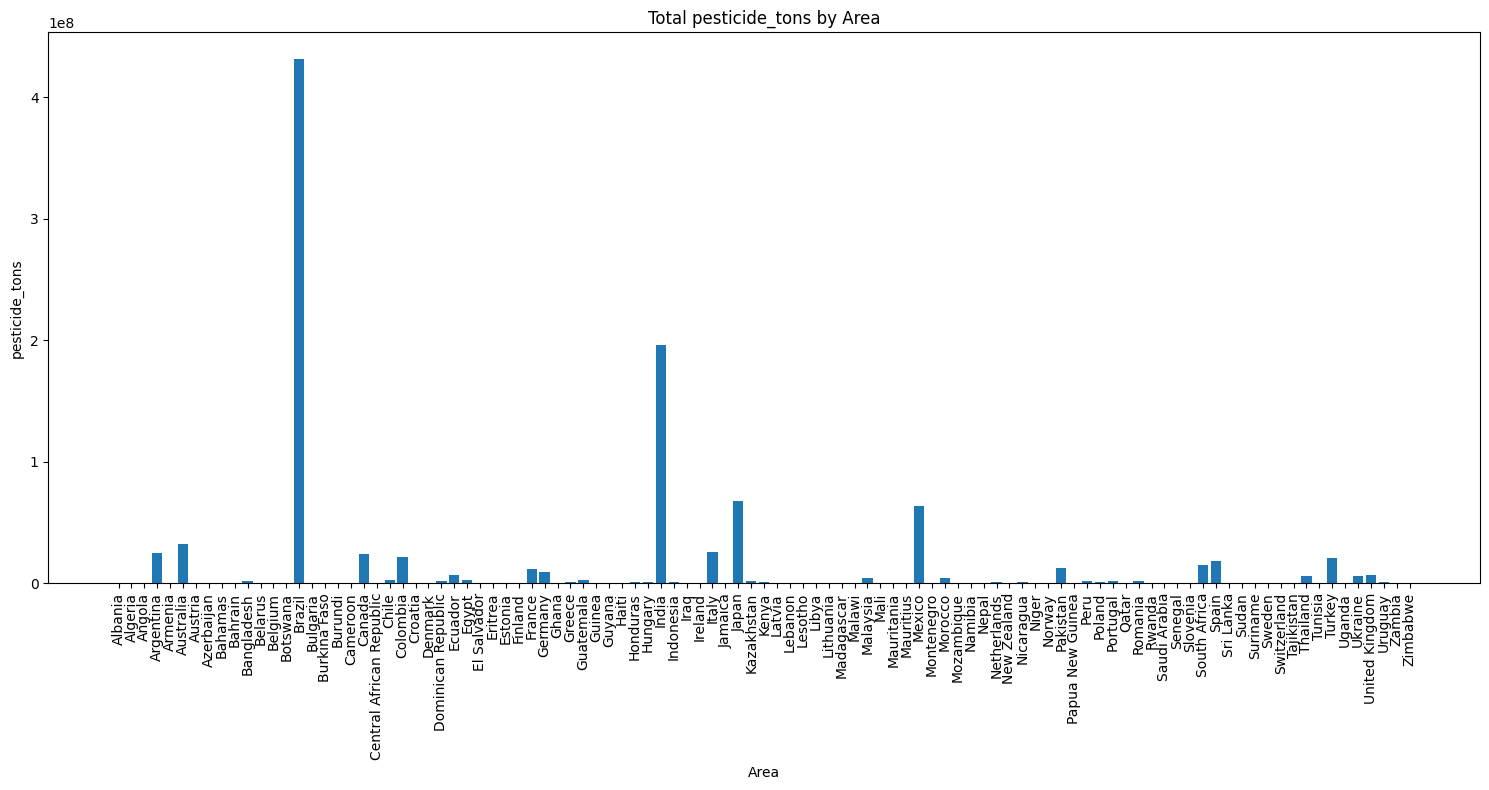

In [ ]:
df_pest_country = dataframe_main.groupby('Area')['pesticide_tons'].sum()

# Create a bar plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
plt.bar(df_pest_country.index, df_pest_country.values)
plt.xlabel('Area')
plt.ylabel('pesticide_tons')
plt.title('Total pesticide_tons by Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

Brazil, India, and Japan top the pesticides usage data. Japan, for its relative area is using a lot of pesticides. Spain, despite being 3 times larger than Japan in its area, uses much less pesticides, and hence is a better model of sustainable agriculture.

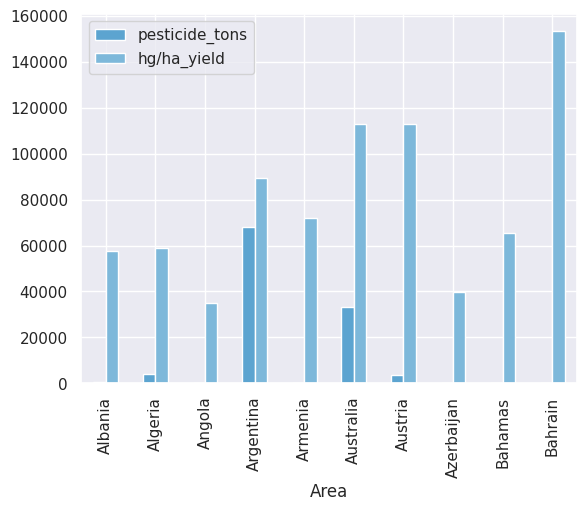

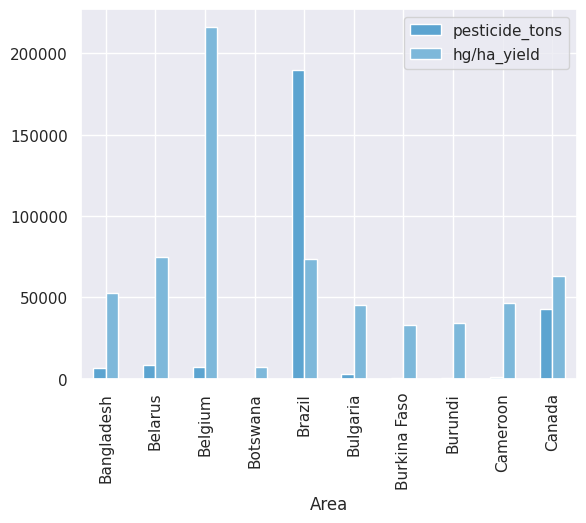

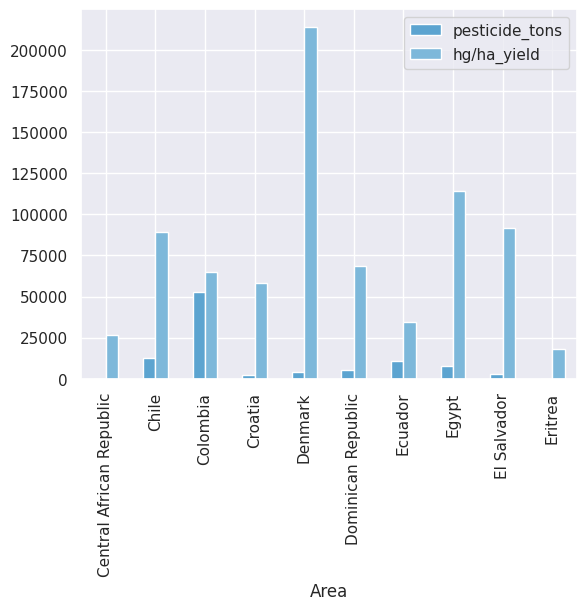

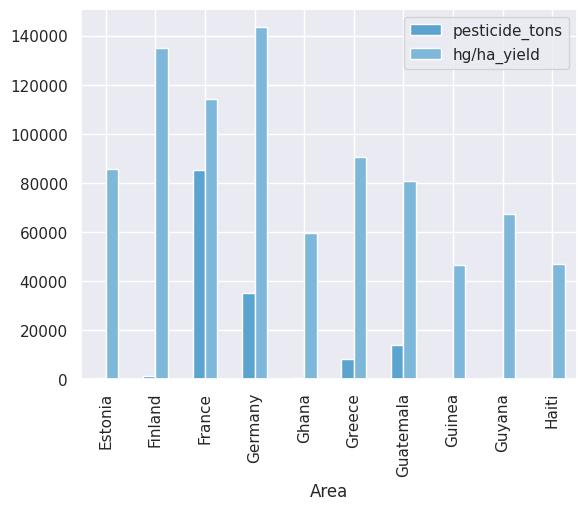

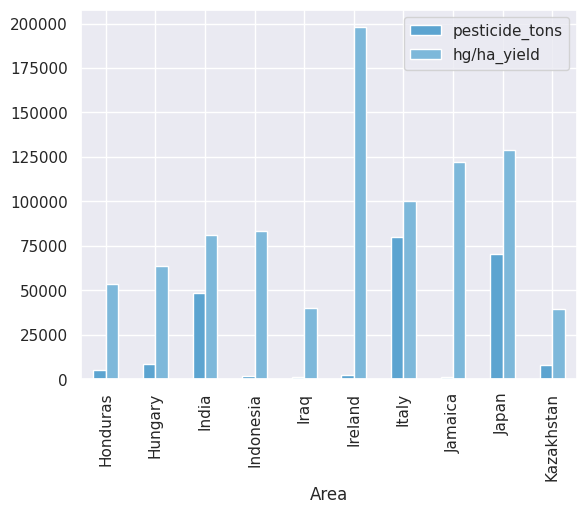

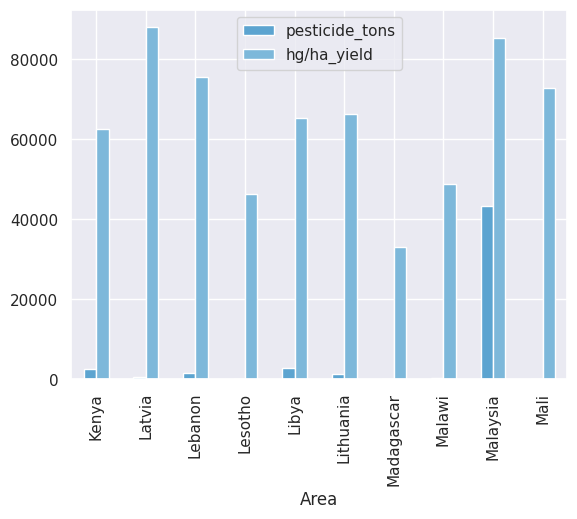

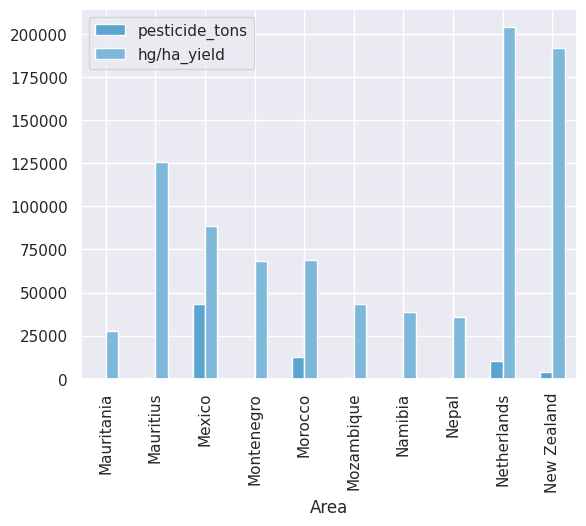

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
colorss = sns.color_palette("Blues_r", n_colors=len(plot_df['Area'].unique()))
for i in range(0,7):
    plot_df = dataframe_main[dataframe_main['Area'].isin(area_chunks[i])]
    plot_df.groupby('Area')[['pesticide_tons', 'hg/ha_yield']].mean().plot(kind='bar',rot=0,color=colorss[-6:])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(
    dataframe_main,
    x='hg/ha_yield',
    y='pesticide_tons',
    color="Area",
    color_discrete_sequence=px.colors.sequential.Greens  # Use the green color scale
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Parameters
num_plots = 7
areas_per_plot = 10

# Get unique areas and split them into chunks
unique_areas = sorted(dataframe_main['Area'].unique())
area_chunks = [unique_areas[i:i + areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]

# Create a subplot layout with 1 row and `num_plots` columns
fig = make_subplots(rows=1, cols=num_plots, subplot_titles=[f"Plot {i+1}" for i in range(num_plots)])

# Add each chunk as a separate plot
for i, chunk in enumerate(area_chunks[:num_plots]):  # Limit to `num_plots`
    plot_df = dataframe_main[dataframe_main['Area'].isin(chunk)]
    scatter = px.scatter(plot_df, x='hg/ha_yield', y='pesticide_tons', color="Area",
                         color_discrete_sequence=px.colors.sequential.Greens)

    # Add traces from scatter plot to subplots
    for trace in scatter['data']:
        fig.add_trace(trace, row=1, col=i+1)

# Update layout and show the plot
fig.update_layout(height=600, width=1500, title_text="Scatter Plots by Area Chunks")
fig.show()


**Inferences**:

Group 1:
Brazil had low yield production and as it used more and more pesticides their production went higher.

However, Argentina, Australia, and Algeria kept their pesticides usage low and they had more yield production that Brazil ever could.

Group 2:
Colombia kept having low yield production despite using more pesticides. It was almost constant despite the increased usage of pesticides.
Canada had one high yield production then went lower while using more pesticides until it had the same fate as Colombia
Egypt, El Salvador, Dominican Republic, and Chile on the other hand, got very high yield productions while using a significantly lower amount of pesticides.

Group 3:
France have high yield production despite its high pesticide usage as it is one of the leading yield production countries. Although, it lessened a little with more pesticides usage.

Germany, Guatemala, and Guyana have high yield production while using less pesticides. even Guatemala had higher production than France at some point.

Group 4:
India and Japan have high yield productions while using less amounts of pesticides. India even beat Japan in some yield productions while using less pesticides as well.

Italy however, is one of the countries that has the highest pesticides usage and its yield production wasn't as high as India and Japan

Group 5:
Mexico uses a significant amount of pesticides and its yield production kept increasing as more pesticides were used.

Mali, Mauritius, and Niger had some high yield productions while using almost no pesticides which is impressive.
Morocco kept using slightly more pesticides until it got a soaring 350k+ production then decreased slightly again.
Nicaragua used more pesticides got to a maximum yield production then decreased again to an amount even lesser than it used to have before additional pesticides.
Group 6:
Senegal got to a soaring 350k+ production while using almost no pesticides.
Saudi Arabia got high yield productions while using a small amount of pesticides.
Portugal got more yield productions while utilizing a little more pesticides until it reached a certain threshold and decreased again.
South Africa has a steady increase of yield production while adding more and more pesticides
Spain on the other hand, has some yield flunctuations but overall it is a high yield production. Although Senegal and South Africa beat it using less pesticides

Group 7:

Tajikistan and Suriname use almost no pesticides and they reached high amounts of yield productions. Even though Tajikistan is one of the least producing countries but it has very high potential of being close to the top producing countries.
United Kingdom has high yield production and uses a fair amount of pesticides it's no surprise as it's one of the leading producing countries.
Turkey has lesser yield productions than United Kingdom and Suriname while utilizing more pesticides. *Thailand and Ukraine used way more pesticides and still their productions were lower than the above countries
Conclusion:
While using pesticides increases yield production, there was an obvious pattern happening.

Yield producion is at a considerable amomunt -> use pesticides -> yield production increases -> comes to maximum production -> yield gradually decreases -> yield becomes even less than the starting yield amount no matter how many more pesticides the country uses.

However, there were some exceptions to this pattern such as France and Japan as they are top leading producing countries and other countries.
You can increase production by using more pesticides but it is temporary nonetheless and in the long run it is better to use less pesticides.
There were a lot of countries that showed impressive yield productions using almost no pesticides and this amount was never reached by other countries who do use pesticides. Those countries were Senegal, Suriname, Tajikistan, Mali, Mauritius, Guyana, Algeria, and El Salvador. They should focus more on growing more crops and businessmen should invest in growing crops in these countries as they have a very high potential in yield production of crops.
Other countries who use a tiny amount of pesticides and still have promising yield productions are Egypt, Chile, Morocco, South Africa, and Guatemala. It is also recommended to invest in these countries as they have reassuring yield productions.
The perfect amount of pesticides to use without having to go through the tedious pattern is 30k and below.

<ipython-input-116-e29b43a0bc6e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




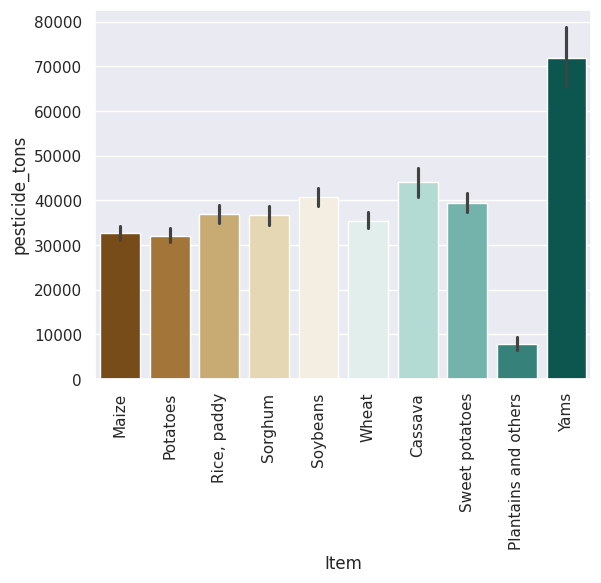

In [ ]:
sns.barplot(data=dataframe_main, x = dataframe_main.Item, y = dataframe_main['pesticide_tons'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

Inferences:

Top pesticides used on items: Yams

Least pesticides used on items: Plantains and others

<ipython-input-117-bae2388be188>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Item', ylabel='hg/ha_yield'>

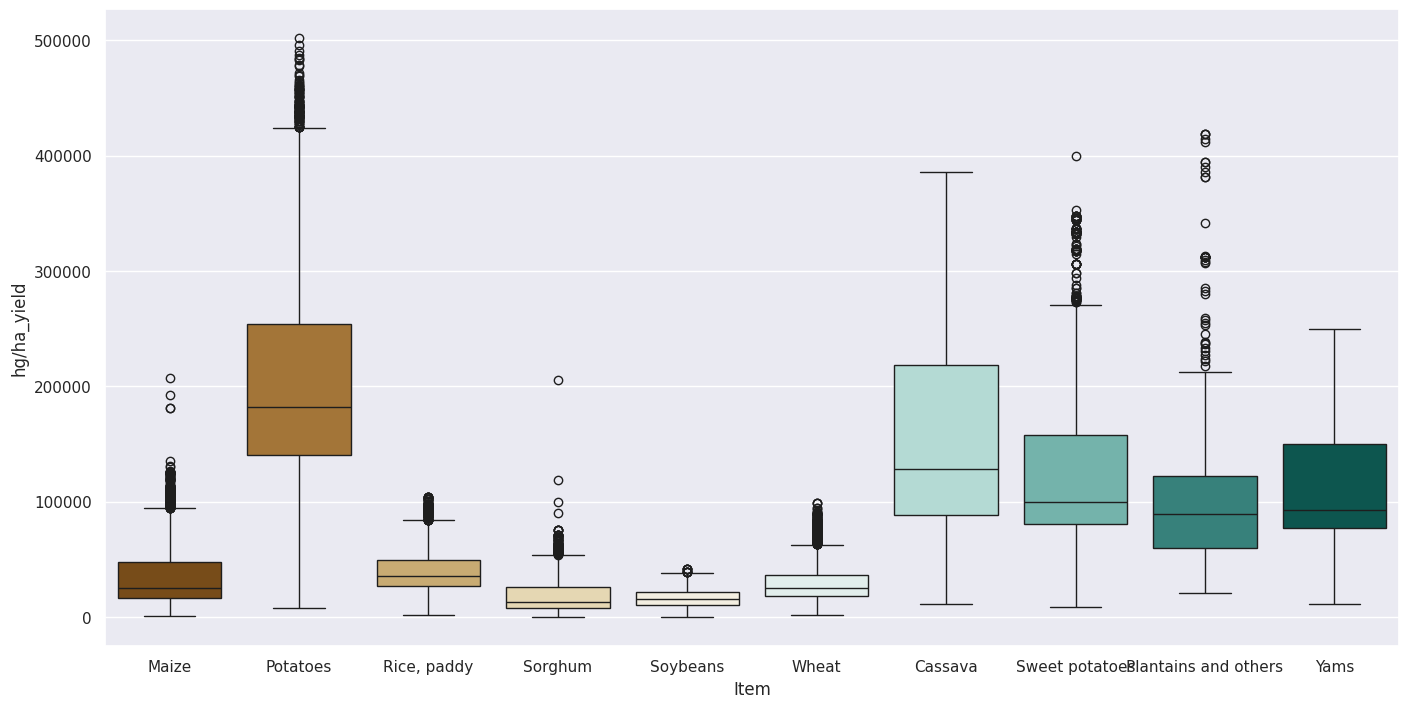

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=dataframe_main,ax=ax)

Top producing items: potatoes, cassava

Least producing items: soybeans, sorghum, wheat, maize, and rice, paddy

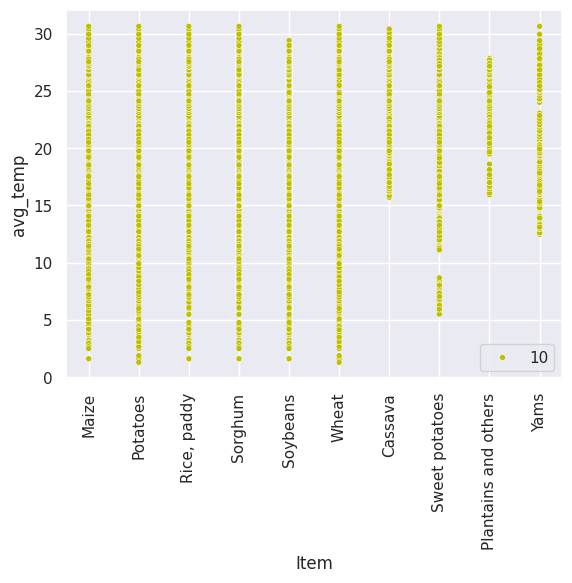

In [ ]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = dataframe_main,size=10,color='y')
plt.xticks(rotation=90);

**Inferences:**
Cassava, Yams, and Plantains and others need more than 15 avg temperature to grow.

All other items can grow at any temperature range

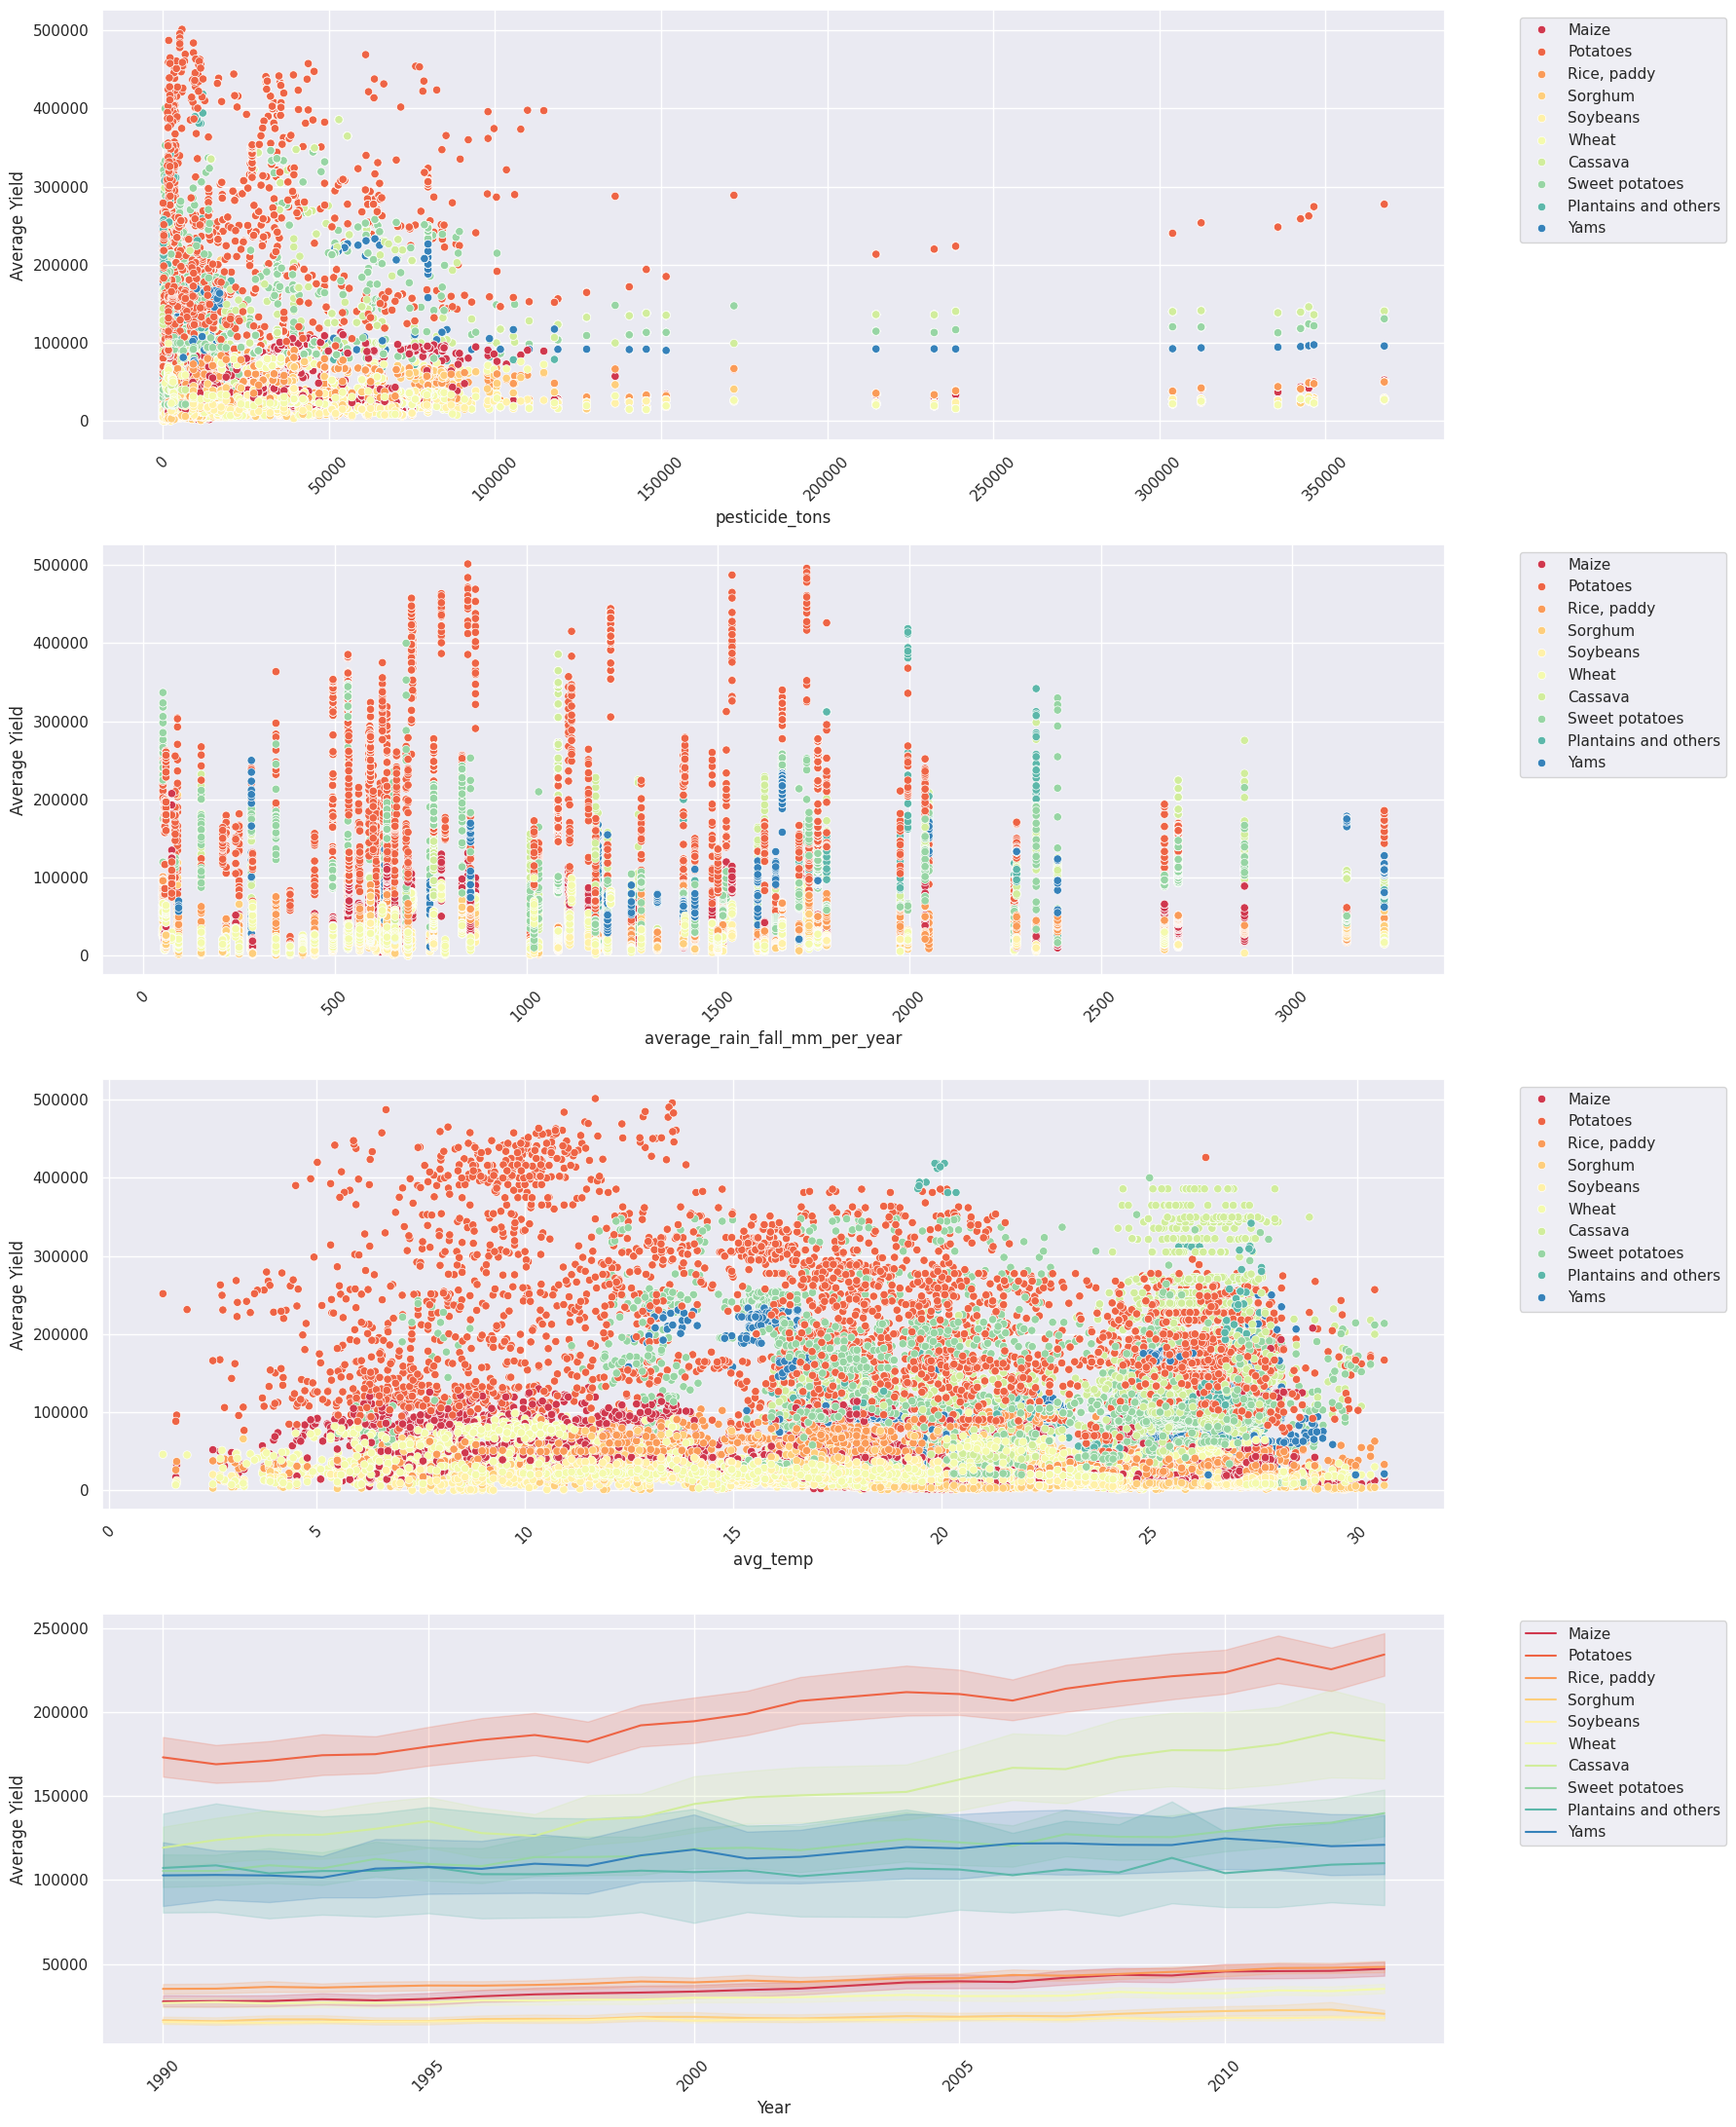

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 1, figsize=(18, 22))

# Plot 1
sns.scatterplot(x="pesticide_tons", y="hg/ha_yield", hue="Item", data=dataframe_main, ax=axes[0], legend=True, palette='Spectral')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2
sns.scatterplot(x="average_rain_fall_mm_per_year", y="hg/ha_yield", hue="Item", data=dataframe_main, ax=axes[1], legend=True, palette='Spectral')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3
sns.scatterplot(x="avg_temp", y="hg/ha_yield", hue="Item", data=dataframe_main, ax=axes[2], legend=True, palette='Spectral')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4
sns.lineplot(x="Year", y="hg/ha_yield", hue="Item", data=dataframe_main, ax=axes[3], legend=True, palette='Spectral')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_ylabel('Average Yield')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Inferences**:

pesticidies_tonnes: it appears that production of items decreases as pesticides increases.

rainfall: it appears that production of items decreases as rainfall increases for more than 2500.

avg_temp: it shows that average yield decreases as average temperature decreases below 5 degrees Celcius.

In [ ]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title=f'Effect of Years on the {i}'


        plt.show()
        yield()

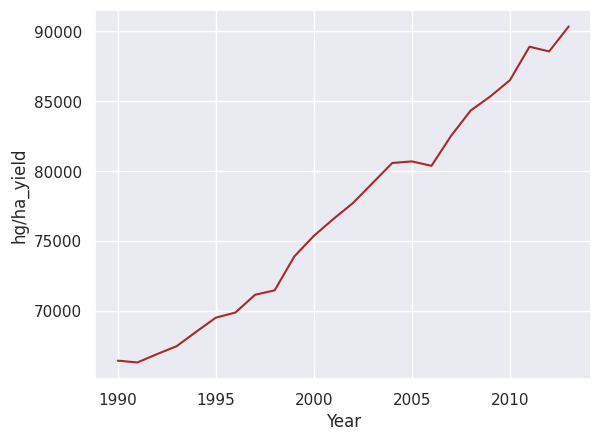

In [ ]:
yplot = change_of_years(dataframe_main)
next(yplot);

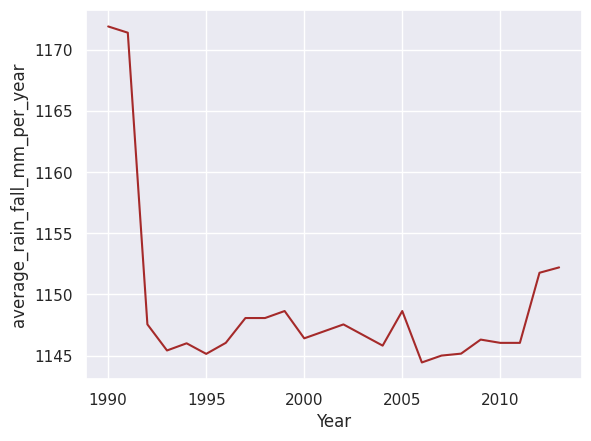

In [ ]:
next(yplot);

Inference:
pesticides have been increasing significantly since 2003

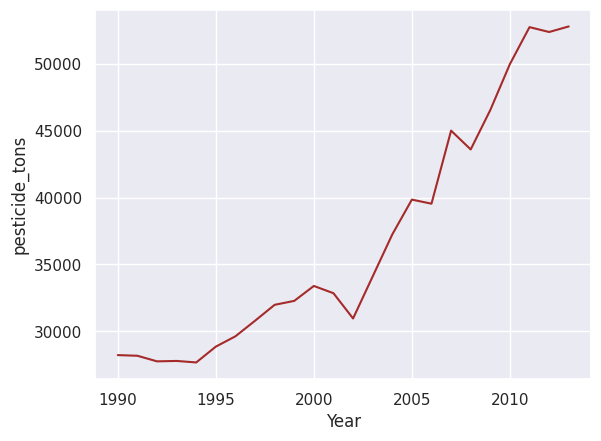

()

In [ ]:
next(yplot)

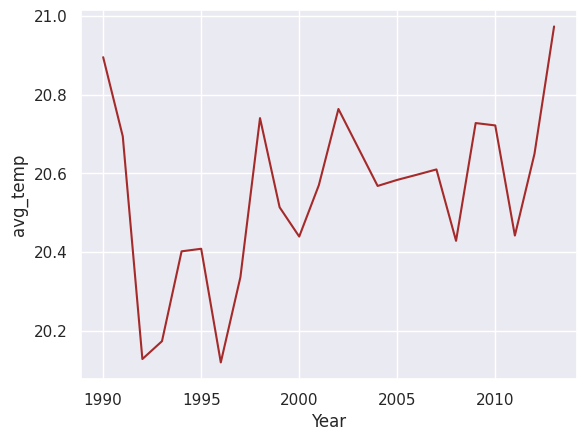

In [ ]:
next(yplot);

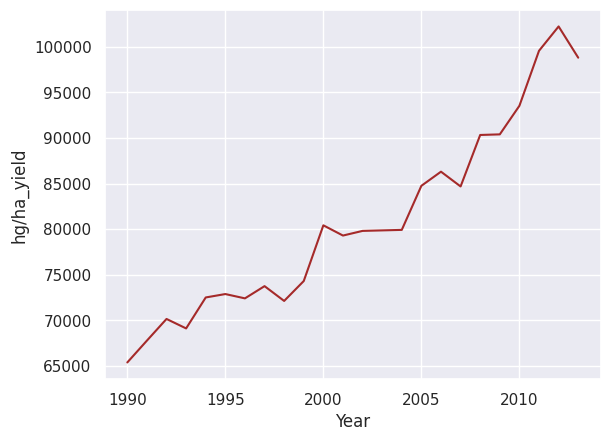

In [ ]:
df_India = dataframe_main.loc[dataframe_main['Area'] == 'India']
yplot = change_of_years(df_India)
next(yplot);

The hg/ha yield for India has been ever increasing, but in recent years has seen a slight blip.

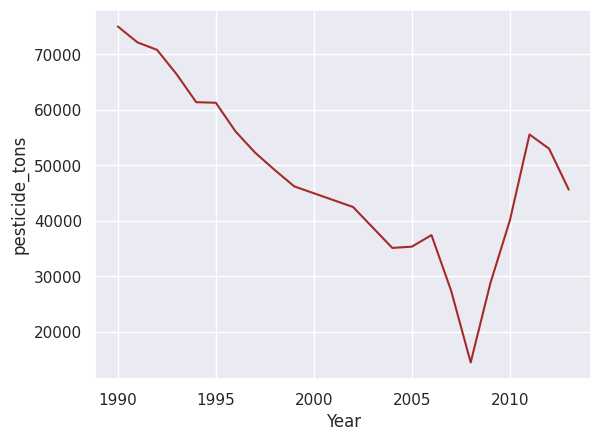

In [ ]:
next(yplot);

use of pesticides have been increasing significantly since 2008, but has seen a slight blip from 2012 onwards.

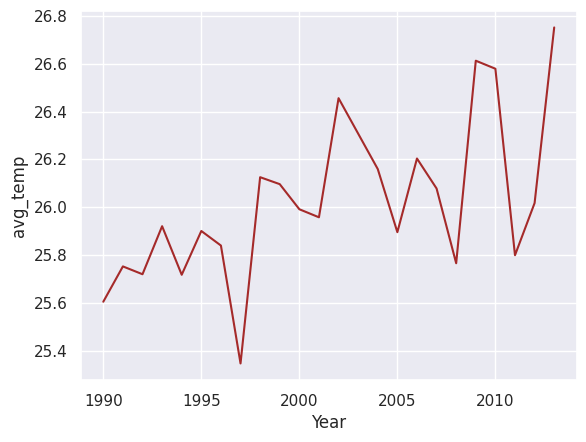

In [ ]:
next(yplot);

**Model Selection, Training & Evaluation**

In [ ]:
features.drop(columns='Year',inplace=True)

<ipython-input-62-a3035fc75994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(columns='Year',inplace=True)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 3.6 MB


**Scaling Features**

The dataset shown above has features with a wide range of magnitudes, units, and ranges. The magnitudes of the features will be far more important in distance computations than the magnitudes of the features.

We must equalize the magnitudes of all characteristics in order to reduce this impact. Scaling can help achieve this.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

The resultant array will be like this after scaling all values in features and removing the year column:

In [ ]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 4.79045997e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.02896082e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 9.08240940e-03, 6.63713799e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 9.17806494e-03, 6.54855196e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

**Training and Test Data**

The training dataset and test dataset will be created from the original dataset. Inequality in the data is typically a result of the model's need for as many data points as feasible during training. For train/test, the typical percentages are 70/30 or 80/20.

The first dataset used to teach a machine learning algorithm to learn and make accurate predictions is known as the training dataset. Eighty per cent of the dataset is a training dataset.

Nevertheless, the test dataset is utilized to evaluate how well the ML algorithm was taught using the training dataset. Because the ML algorithm would already "know" the expected output, it would be pointless to test the method by simply reusing the training dataset. A test dataset makes up twenty percent(%) of the dataset.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22593, 114)
X_test shape: (5649, 114)
y_train shape: (22593,)
y_test shape: (5649,)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Define the function to compare models
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(X_train, y_train)
    y_pred = fit.predict(X_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return [model_name, r2, mae, rmse]

# Define models to compare
models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
    DecisionTreeRegressor()
]

# Run the comparison
model_train = list(map(compare_models, models))

# Print results in a readable format
for result in model_train:
    print(f"Model: {result[0]}, R²: {result[1]:.2f}, MAE: {result[2]:.2f}, RMSE: {result[3]:.2f}")

Model: GradientBoostingRegressor, R²: 0.89, MAE: 17820.25, RMSE: 27439.28
Model: RandomForestRegressor, R²: 0.69, MAE: 31748.36, RMSE: 46829.50
Model: SVR, R²: -0.20, MAE: 56594.83, RMSE: 92522.01
Model: DecisionTreeRegressor, R²: 0.96, MAE: 5869.98, RMSE: 16599.75


Results indicate significant differences in model performance:

DecisionTreeRegressor:

R²: 0.96 (highest among all models, indicating strong predictive power) MAE: 5,891.99 and RMSE: 16,771.55 (lowest errors, suggesting it makes the most accurate predictions overall) Interpretation: This model seems to fit the data very well, with a high 𝑅2 and relatively low error metrics, which is promising.

GradientBoostingRegressor:

R²: 0.89 (still relatively high, indicating good predictive performance) MAE: 17,820.25 and RMSE: 27,439.28 (higher errors compared to the Decision Tree but better than other models)

Interpretation: This model is performing well but may need further tuning to reduce error. The higher RMSE compared to MAE suggests some larger prediction errors.

RandomForestRegressor: R²: 0.69 (moderate predictive power) MAE: 31,748.36 and RMSE: 46,829.50 (errors are substantially higher than the Decision Tree and Gradient Boosting models)

Interpretation: The Random Forest is underperforming here. It may benefit from more tuning or increasing max_depth to capture more patterns.

SVR (Support Vector Regressor): R²: -0.20 (a negative R² indicates poor fit, performing worse than a simple mean baseline) MAE: 56,594.83 and RMSE: 92,522.01 (very high errors, indicating that predictions are quite off)

Interpretation: This model is not suitable for this dataset as it performs poorly. SVR models generally work best with standardized features and may struggle if the target variable has a wide range.

In [ ]:
dataframe_main_onehot = dataframe_main_onehot.drop(['Year'], axis=1)
dataframe_main_onehot.head()

hg/ha_yield  average_rain_fall_mm_per_year  pesticide_tons  avg_temp  \
0        36613                         1485.0           121.0     16.37   
1        29068                         1485.0           121.0     15.36   
2        24876                         1485.0           121.0     16.06   
3        24185                         1485.0           121.0     16.05   
4        25848                         1485.0           201.0     16.96   

   Country_Albania  Country_Algeria  Country_Angola  Country_Argentina  \
0             True            False           False              False   
1             True            False           False              False   
2             True            False           False              False   
3             True            False           False              False   
4             True            False           False              False   

   Country_Armenia  Country_Australia  ...  Item_Cassava  Item_Maize  \
0            False              False  ...         False        True   
1            False              False  ...         False        True   
2            False              False  ...         False        True   
3            False              False  ...         False        True   
4            False              False  ...         False        True   

   Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  Item_Sorghum  \
0                      False          False             False         False   
1                      False          False             False         False   
2                      False          False             False         False   
3                      False          False             False         False   
4                      False          False             False         False   

   Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
0          False                False       False      False  
1          False                False       False      False  
2          False                False       False      False  
3          False                False       False      False  
4          False                False       False      False  

[5 rows x 115 columns]

In [ ]:
# converting test data to columns from the dataframe and omitting the values for "hg/ha yield," which the machine learning model should be predicting
dataframe_test=pd.DataFrame(X_test,columns=dataframe_main_onehot.loc[:, dataframe_main_onehot.columns != 'hg/ha_yield'].columns)

# utilizing the stack function to pivot the columns of the current dataframe and return a reshaped dataframe

cntry=dataframe_test[[col for col in dataframe_test.columns if 'Country' in col]].stack()[dataframe_test[[col for col in dataframe_test.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=dataframe_test[[col for col in dataframe_test.columns if 'Item' in col]].stack()[dataframe_test[[col for col in dataframe_test.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]


dataframe_test.head()

average_rain_fall_mm_per_year  pesticide_tons  avg_temp  Country_Albania  \
0                       0.183443        0.090370  0.535264              0.0   
1                       0.458451        0.000135  0.631005              0.0   
2                       0.183443        0.132330  0.552300              0.0   
3                       1.000000        0.179695  0.867802              0.0   
4                       0.458451        0.000305  0.629983              0.0   

   Country_Algeria  Country_Angola  Country_Argentina  Country_Armenia  \
0              0.0             0.0                0.0              0.0   
1              0.0             0.0                0.0              0.0   
2              0.0             0.0                0.0              0.0   
3              0.0             0.0                0.0              0.0   
4              0.0             0.0                0.0              0.0   

   Country_Australia  Country_Austria  ...  Item_Cassava  Item_Maize  \
0                0.0              0.0  ...           0.0         0.0   
1                0.0              0.0  ...           0.0         0.0   
2                0.0              0.0  ...           0.0         0.0   
3                0.0              0.0  ...           0.0         0.0   
4                0.0              0.0  ...           0.0         0.0   

   Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  Item_Sorghum  \
0                        0.0            0.0               0.0           0.0   
1                        0.0            1.0               0.0           0.0   
2                        0.0            0.0               0.0           0.0   
3                        0.0            0.0               0.0           0.0   
4                        0.0            0.0               1.0           0.0   

   Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
0            0.0                  1.0         0.0        0.0  
1            0.0                  0.0         0.0        0.0  
2            0.0                  1.0         0.0        0.0  
3            1.0                  0.0         0.0        0.0  
4            0.0                  0.0         0.0        0.0  

[5 rows x 114 columns]

In [ ]:
dataframe_test.drop([col for col in dataframe_test.columns if 'Item' in col],axis=1,inplace=True)
dataframe_test.drop([col for col in dataframe_test.columns if 'Country' in col],axis=1,inplace=True)
dataframe_test.head()

average_rain_fall_mm_per_year  pesticide_tons  avg_temp
0                       0.183443        0.090370  0.535264
1                       0.458451        0.000135  0.631005
2                       0.183443        0.132330  0.552300
3                       1.000000        0.179695  0.867802
4                       0.458451        0.000305  0.629983

In [ ]:
dataframe_test['Country']=countries
dataframe_test['Item']=items
dataframe_test.head()

average_rain_fall_mm_per_year  pesticide_tons  avg_temp     Country  \
0                       0.183443        0.090370  0.535264       Spain   
1                       0.458451        0.000135  0.631005  Madagascar   
2                       0.183443        0.132330  0.552300       Spain   
3                       1.000000        0.179695  0.867802    Colombia   
4                       0.458451        0.000305  0.629983  Madagascar   

             Item  
0  Sweet potatoes  
1        Potatoes  
2  Sweet potatoes  
3        Soybeans  
4     Rice, paddy

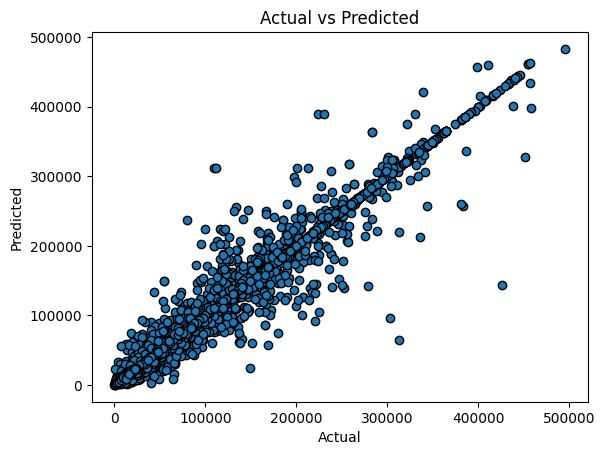

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(X_train,y_train)

dataframe_test["yield_predicted"]= model.predict(X_test)
dataframe_test["yield_actual"]=pd.DataFrame(y_test)["hg/ha_yield"].tolist()
test_group=dataframe_test.groupby("Item")

# So let's compare the model's actual values to its predictions.

fig, ax = plt.subplots()

ax.scatter(dataframe_test["yield_actual"], dataframe_test["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

The scatterplot of actual vs. predicted values shows a strong positive linear relationship, suggesting that the model is performing well in general. Here are some key observations:

Tight Clustering Around the Line: Many points lie close to the diagonal line (where Actual = Predicted), indicating that the predictions are generally accurate.

Slight Spread at Higher Values: There is a noticeable increase in variance as the actual values increase, which suggests that the model may be less accurate for larger yield values. This could be due to greater inherent variability in these cases or limited training data in this range.

Overall Trend: The linear trend suggests that the model captures the overall relationship between features and yield.

MAE: 5908.258393816014
RMSE: 16791.688044912033


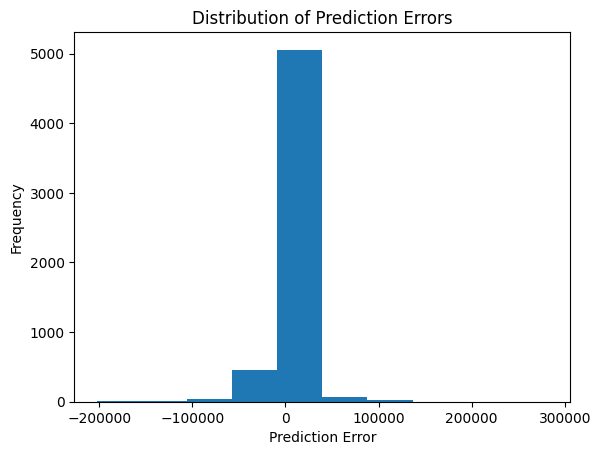

In [ ]:
mae = mean_absolute_error(dataframe_test["yield_actual"], dataframe_test["yield_predicted"])
rmse = np.sqrt(mean_squared_error(dataframe_test["yield_actual"], dataframe_test["yield_predicted"]))

print("MAE:", mae)
print("RMSE:", rmse)

# Visualize the distribution of errors
errors = dataframe_test["yield_actual"] - dataframe_test["yield_predicted"]
plt.hist(errors)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

The above histplot shows that most prediction errors are centered around zero, with a very high peak, indicating that the model's predictions are generally accurate for the majority of cases.

Perform Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score


# Choose the model you want to perform cross-validation on

clf = DecisionTreeRegressor()

# Perform k-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.95671978 0.96451301 0.9575996  0.96048818 0.96391392]
Average cross-validation score: 0.9606468962121213


The cross-validation results indicate strong model performance with consistent scores across the folds:

Cross-validation scores: The values range from approximately 0.9567 to 0.9645, showing minimal variance. This consistency suggests that the model generalizes well across different subsets of the data.
Average cross-validation score: The average score of 0.9606 confirms a high level of predictive accuracy, as it's close to 1. This indicates the model is fitting the data well without major overfitting or underfitting issues.

In [ ]:
# Create a comparison DataFrame with 'Actual' and 'Predicted' values
comparison_df = pd.DataFrame({
    "Item": dataframe_test["Item"],
    "Yield_Actual": dataframe_test["yield_actual"],
    "Yield_Predicted": dataframe_test["yield_predicted"]
})

# Display the first few rows of the comparison DataFrame
print(comparison_df.head())


             Item  Yield_Actual  Yield_Predicted
0  Sweet potatoes        158147         158147.0
1        Potatoes         59388          56139.0
2  Sweet potatoes        164267         164267.0
3        Soybeans         20361          20361.0
4     Rice, paddy         30495          20782.0


Based on the Actual v/s Predicted scatterplot,comparison dataframe, the mae and rmse values from the decision tree model, the actual and predicted values are quite close to each other, indicating good predicting power of the Machine Learning decision model based on decision tree supervised regression and the mae and rmse evaluation metrics.

Which of the features or variables impacted the data the most?

<ipython-input-83-94e9f46842a3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);


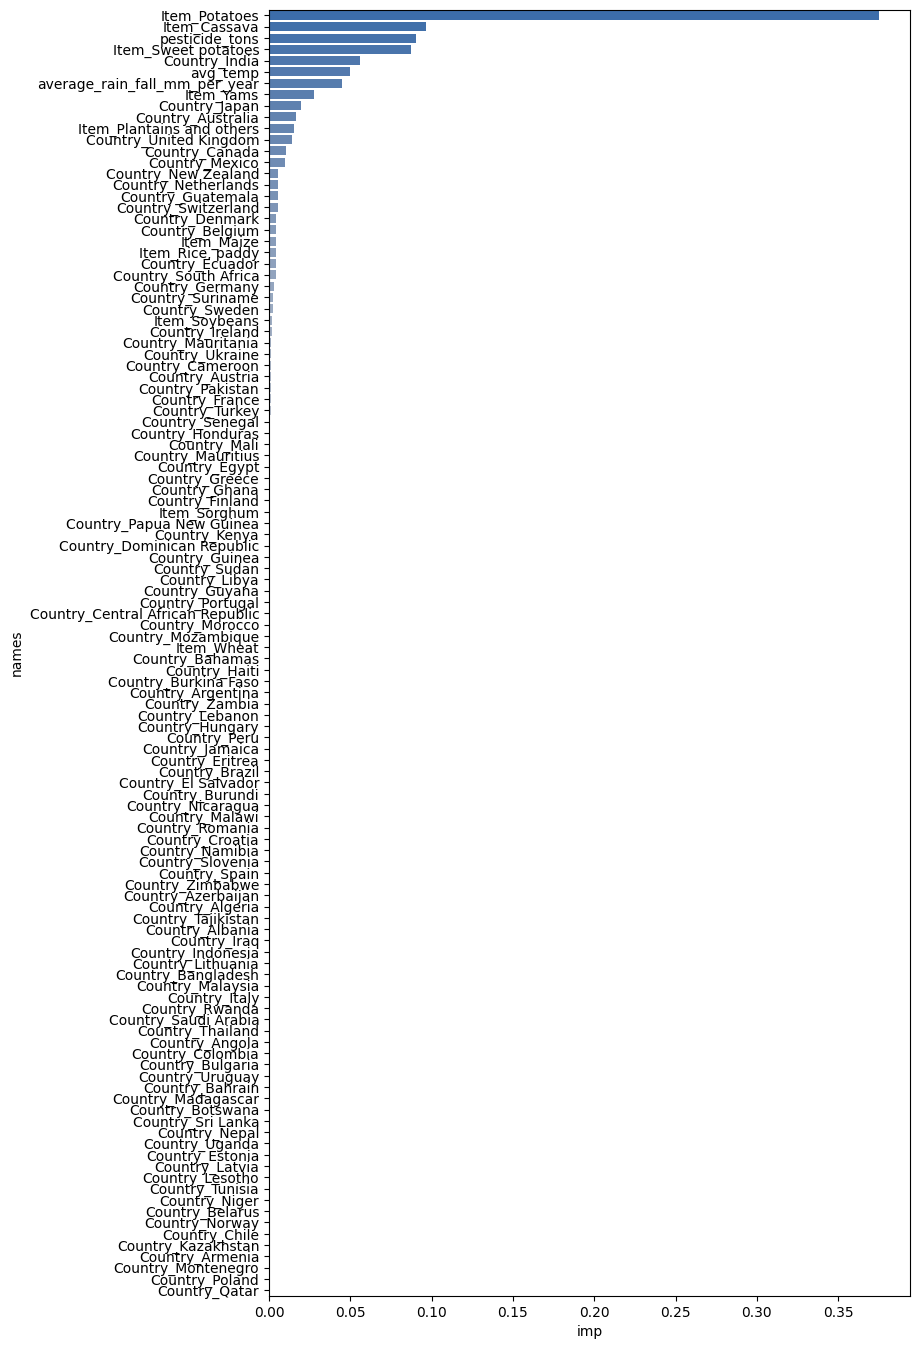

In [ ]:
varimp= {'imp':model.feature_importances_,'names':dataframe_main_onehot.columns[dataframe_main_onehot.columns!="hg/ha_yield"]}

a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
dfdf=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

<ipython-input-85-2e6f3cf6de59>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp", y="names", palette="vlag", data=top_7_features, orient="h", ax=ax);


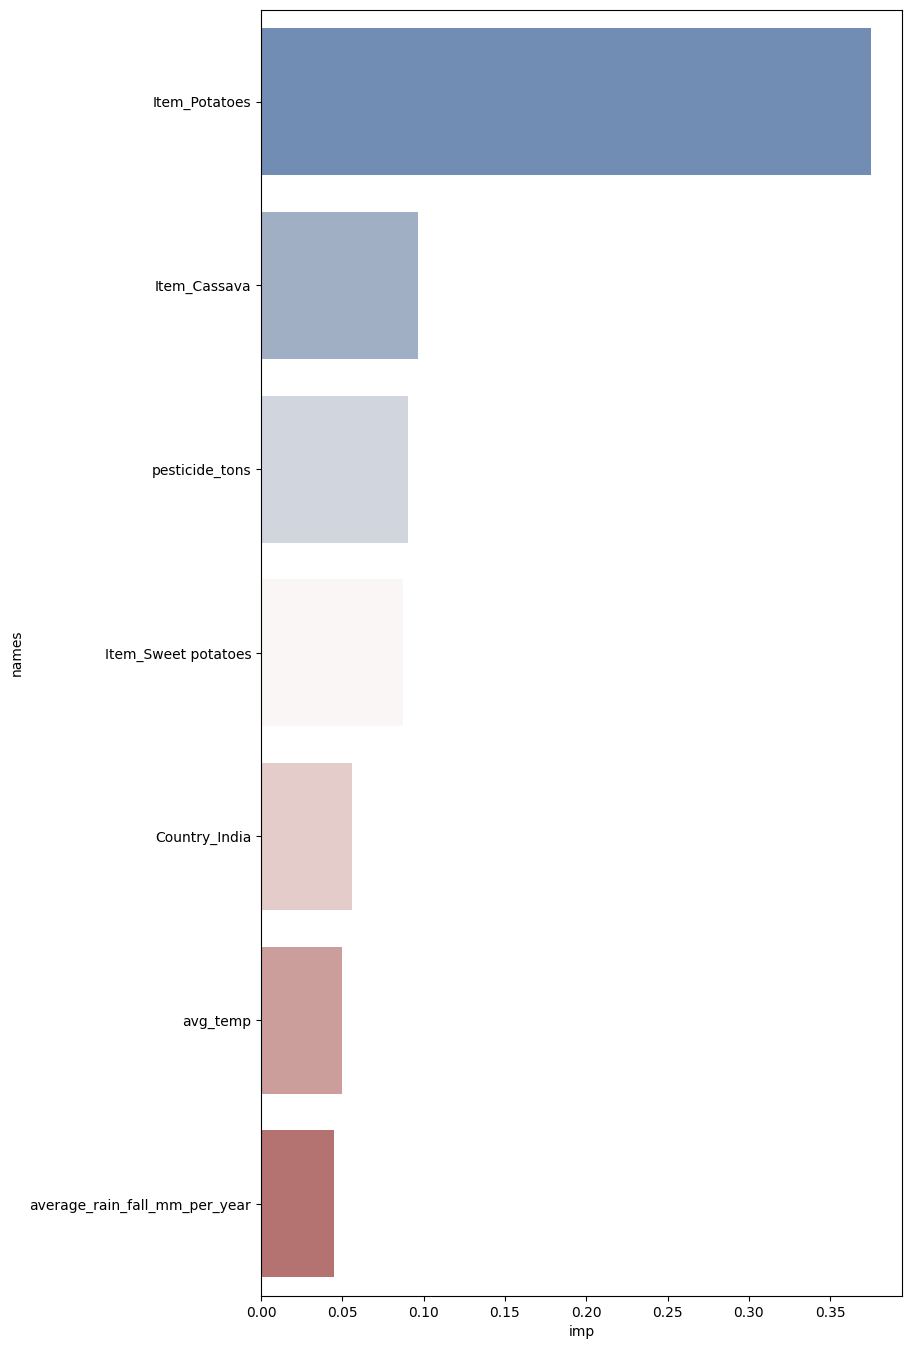

In [ ]:
# Get feature importances and their corresponding names
varimp = {'imp': model.feature_importances_, 'names': dataframe_main_onehot.columns[dataframe_main_onehot.columns != "hg/ha_yield"]}

# Create a DataFrame from the feature importances dictionary
df = pd.DataFrame.from_dict(varimp)

# Sort the DataFrame by importance in descending order
df.sort_values(ascending=False, by=['imp'], inplace=True)

# Drop any rows with missing values (if any)
df = df.dropna()

# Obtain the top 7 characteristics
top_7_features = df.head(7)

# Create a horizontal bar plot using seaborn
a4_dims = (8.27, 16.7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x="imp", y="names", palette="vlag", data=top_7_features, orient="h", ax=ax);

T

Dominant Feature - Item_Potatoes:

The feature Item_Potatoes has the highest importance by a significant margin. . It could indicate that "Potatoes" yield characteristics are unique or that there’s a lot of yield data for potatoes, leading the model to heavily rely on this feature.

Moderate Importance of Other Crops and pesticide_tons:

Item_Cassava, pesticide_tons, and Item_Sweet potatoes also contribute meaningfully but with much lower importance than Item_Potatoes. This suggests that these crops also have unique yield patterns, but they aren’t as impactful as potatoes in driving predictions.

The pesticide_tons feature may reflect how pesticide usage influences crop yield, though it appears to be a less significant factor compared to crop type.

Influence of Country_India:

The presence of the feature Country_India indicates that the country has a specific influence on yield, potentially due to distinct growing conditions, farming practices, or crop data specific to India.

Weather Variables - avg_temp and average_rain_fall_mm_per_year:

These weather-related features (avg_temp and average_rain_fall_mm_per_year) have lower, but still relevant, importances. They contribute to understanding the conditions that may affect yields but aren’t as predictive as specific crop or country identifiers.

**CONCLUSION:**

In conclusion, crop yield prediction using machine learning has the potential to revolutionize the agriculture industry. By providing more accurate predictions, improving decision-making, increasing efficiency, and enhancing sustainability, this technology can help farmers to achieve better yields and more profitable businesses. While there are some challenges to using machine learning for crop yield prediction, the benefits are clear, and we can expect to see continued advancements in this field in the years to come.

In [ ]:
# prompt: provide a short summary for the above project on crop yield prediction

This project focuses on predicting crop yield using machine learning techniques. It analyzes a dataset containing information on crop type, geographic location, weather conditions, and pesticide usage, aiming to identify factors that influence crop yield.

The project explores data visualization to understand relationships between variables and yield. Machine learning models like Decision Tree Regressor, Gradient Boosting Regressor, Random Forest Regressor, and Support Vector Regressor are compared for their prediction accuracy.

The Decision Tree Regressor is found to perform the best, accurately predicting crop yield based on the given features. The project also investigates feature importance to understand which variables have the most significant impact on yield prediction, revealing that specific crop types and country-specific conditions are major determinants.

Ultimately, the findings demonstrate the potential of machine learning for precise crop yield prediction, benefiting decision-making and efficiency within the agriculture sector.
